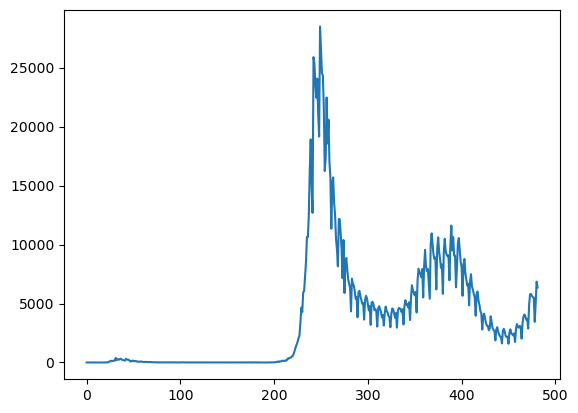

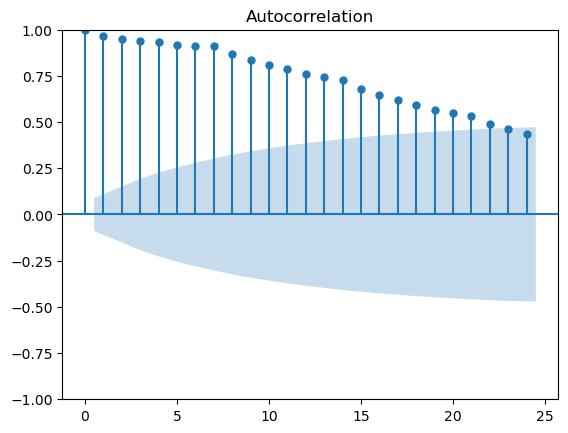

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


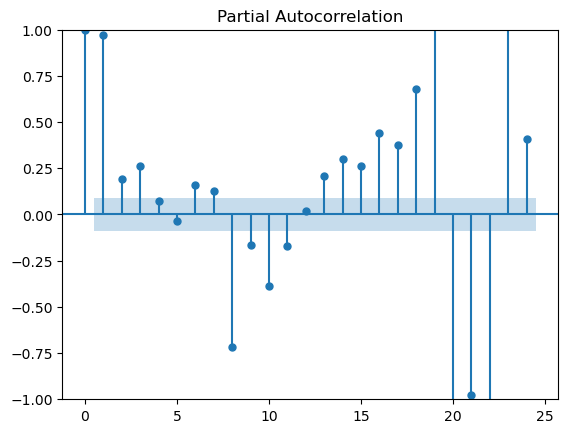

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\新北市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('NewTaipei.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('NewTaipei_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('NewTaipei_pacf_24.png')
plt.show()

In [3]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\新北市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        2
3        2
4        1
..     ...
478   3444
479   5004
480   6855
481   6365
482   5661

[483 rows x 1 columns]
483


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
44/44 [==============================] - 7s 39ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 2/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/5000
44/44 [==============================

Epoch 56/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7607e-04 - val_mse: 8.7607e-04
Epoch 57/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.5495e-04 - val_mse: 8.5495e-04
Epoch 58/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.3274e-04 - val_mse: 8.3274e-04
Epoch 59/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.1902e-04 - val_mse: 8.1902e-04
Epoch 60/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.2430e-04 - val_mse: 8.2430e-04
Epoch 61/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.9145e-04 - val_mse: 7.9145e-04
Epoch 62/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.9761e-04 - val_mse: 7.9761e-04
Epoch 63

Epoch 114/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7719e-04 - val_mse: 6.7719e-04
Epoch 115/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7448e-04 - val_mse: 6.7448e-04
Epoch 116/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7764e-04 - val_mse: 6.7764e-04
Epoch 117/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7858e-04 - val_mse: 6.7858e-04
Epoch 118/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7806e-04 - val_mse: 6.7806e-04
Epoch 119/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7959e-04 - val_mse: 6.7959e-04
Epoch 120/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 6.8119e-04 - val_mse: 6.8119e-04
Epoch 

Epoch 229/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4047e-04 - val_mse: 7.4047e-04
Epoch 230/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3817e-04 - val_mse: 7.3817e-04
Epoch 231/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4043e-04 - val_mse: 7.4043e-04
Epoch 232/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3759e-04 - val_mse: 7.3759e-04
Epoch 233/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3932e-04 - val_mse: 7.3932e-04
Epoch 234/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3574e-04 - val_mse: 7.3574e-04
Epoch 235/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3484e-04 - val_mse: 7.3484e-04
Epoch

Epoch 287/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4429e-04 - val_mse: 7.4429e-04
Epoch 288/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4274e-04 - val_mse: 7.4274e-04
Epoch 289/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4494e-04 - val_mse: 7.4494e-04
Epoch 290/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3531e-04 - val_mse: 7.3531e-04
Epoch 291/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4261e-04 - val_mse: 7.4261e-04
Epoch 292/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4071e-04 - val_mse: 7.4071e-04
Epoch 293/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4363e-04 - val_mse: 7.4363e-04
Epoch 

Epoch 402/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3923e-04 - val_mse: 7.3923e-04
Epoch 403/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3511e-04 - val_mse: 7.3511e-04
Epoch 404/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3780e-04 - val_mse: 7.3780e-04
Epoch 405/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4866e-04 - val_mse: 7.4866e-04
Epoch 406/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4247e-04 - val_mse: 7.4247e-04
Epoch 407/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3955e-04 - val_mse: 7.3955e-04
Epoch 408/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3821e-04 - val_mse: 7.3821e-04
Epoch

Epoch 460/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4453e-04 - val_mse: 7.4453e-04
Epoch 461/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3787e-04 - val_mse: 7.3787e-04
Epoch 462/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5387e-04 - val_mse: 7.5387e-04
Epoch 463/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3934e-04 - val_mse: 7.3934e-04
Epoch 464/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4339e-04 - val_mse: 7.4339e-04
Epoch 465/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4305e-04 - val_mse: 7.4305e-04
Epoch 466/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3981e-04 - val_mse: 7.3981e-04
Epoch

Epoch 518/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4041e-04 - val_mse: 7.4041e-04
Epoch 519/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3809e-04 - val_mse: 7.3809e-04
Epoch 520/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4150e-04 - val_mse: 7.4150e-04
Epoch 521/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4542e-04 - val_mse: 7.4542e-04
Epoch 522/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4158e-04 - val_mse: 7.4158e-04
Epoch 523/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4502e-04 - val_mse: 7.4502e-04
Epoch 524/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3801e-04 - val_mse: 7.3801e-04
Epoch

Epoch 576/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3863e-04 - val_mse: 7.3863e-04
Epoch 577/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3850e-04 - val_mse: 7.3850e-04
Epoch 578/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3814e-04 - val_mse: 7.3814e-04
Epoch 579/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3647e-04 - val_mse: 7.3647e-04
Epoch 580/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3655e-04 - val_mse: 7.3655e-04
Epoch 581/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3913e-04 - val_mse: 7.3913e-04
Epoch 582/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3944e-04 - val_mse: 7.3944e-04
Ep

Epoch 691/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3384e-04 - val_mse: 7.3384e-04
Epoch 692/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4089e-04 - val_mse: 7.4089e-04
Epoch 693/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3427e-04 - val_mse: 7.3427e-04
Epoch 694/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 695/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3339e-04 - val_mse: 7.3339e-04
Epoch 696/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3404e-04 - val_mse: 7.3404e-04
Epoch 697/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3606e-04 - val_mse: 7.3606e-04
Epoch

Epoch 749/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3298e-04 - val_mse: 7.3298e-04
Epoch 750/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3050e-04 - val_mse: 7.3050e-04
Epoch 751/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3285e-04 - val_mse: 7.3285e-04
Epoch 752/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3660e-04 - val_mse: 7.3660e-04
Epoch 753/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3429e-04 - val_mse: 7.3429e-04
Epoch 754/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3222e-04 - val_mse: 7.3222e-04
Epoch 755/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3694e-04 - val_mse: 7.3694e-04
Epoch

Epoch 864/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3713e-04 - val_mse: 7.3713e-04
Epoch 865/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3482e-04 - val_mse: 7.3482e-04
Epoch 866/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3309e-04 - val_mse: 7.3309e-04
Epoch 867/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3586e-04 - val_mse: 7.3586e-04
Epoch 868/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3567e-04 - val_mse: 7.3567e-04
Epoch 869/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3397e-04 - val_mse: 7.3397e-04
Epoch 870/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3444e-04 - val_mse: 7.3444e-04
Epoch 

Epoch 979/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3557e-04 - val_mse: 7.3557e-04
Epoch 980/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3461e-04 - val_mse: 7.3461e-04
Epoch 981/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3505e-04 - val_mse: 7.3505e-04
Epoch 982/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3102e-04 - val_mse: 7.3102e-04
Epoch 983/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2880e-04 - val_mse: 7.2880e-04
Epoch 984/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3140e-04 - val_mse: 7.3140e-04
Epoch 985/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3296e-04 - val_mse: 7.3296e-04
Epoch 

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3250e-04 - val_mse: 7.3250e-04
Epoch 1094/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3384e-04 - val_mse: 7.3384e-04
Epoch 1095/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3035e-04 - val_mse: 7.3035e-04
Epoch 1096/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2878e-04 - val_mse: 7.2878e-04
Epoch 1097/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3401e-04 - val_mse: 7.3401e-04
Epoch 1098/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3231e-04 - val_mse: 7.3231e-04
Epoch 1099/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3150e-04 - val_mse: 7.3150e-04
Epoch 1100/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3048e-04 - val_mse: 7.3048e-04
Epoch 1208/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2832e-04 - val_mse: 7.2832e-04
Epoch 1209/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3070e-04 - val_mse: 7.3070e-04
Epoch 1210/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2544e-04 - val_mse: 7.2544e-04
Epoch 1211/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2914e-04 - val_mse: 7.2914e-04
Epoch 1212/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2862e-04 - val_mse: 7.2862e-04
Epoch 1213/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2641e-04 - val_mse: 7.2641e-04
Epoch 1214/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2618e-04 - val_mse: 7.2618e-04
Epoch 1322/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2710e-04 - val_mse: 7.2710e-04
Epoch 1323/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2458e-04 - val_mse: 7.2458e-04
Epoch 1324/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2965e-04 - val_mse: 7.2965e-04
Epoch 1325/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3134e-04 - val_mse: 7.3134e-04
Epoch 1326/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2420e-04 - val_mse: 7.2420e-04
Epoch 1327/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2460e-04 - val_mse: 7.2460e-04
Epoch 1328/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2666e-04 - val_mse: 7.2666e-04
Epoch 1436/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2453e-04 - val_mse: 7.2453e-04
Epoch 1437/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2395e-04 - val_mse: 7.2395e-04
Epoch 1438/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2483e-04 - val_mse: 7.2483e-04
Epoch 1439/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1924e-04 - val_mse: 7.1924e-04
Epoch 1440/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2567e-04 - val_mse: 7.2567e-04
Epoch 1441/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2341e-04 - val_mse: 7.2341e-04
Epoch 1442/5000

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2418e-04 - val_mse: 7.2418e-04
Epoch 1550/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2660e-04 - val_mse: 7.2660e-04
Epoch 1551/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2096e-04 - val_mse: 7.2096e-04
Epoch 1552/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1991e-04 - val_mse: 7.1991e-04
Epoch 1553/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2037e-04 - val_mse: 7.2037e-04
Epoch 1554/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2401e-04 - val_mse: 7.2401e-04
Epoch 1555/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2557e-04 - val_mse: 7.2557e-04
Epoch 1556/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2305e-04 - val_mse: 7.2305e-04
Epoch 1664/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2269e-04 - val_mse: 7.2269e-04
Epoch 1665/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2187e-04 - val_mse: 7.2187e-04
Epoch 1666/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2014e-04 - val_mse: 7.2014e-04
Epoch 1667/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2089e-04 - val_mse: 7.2089e-04
Epoch 1668/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2394e-04 - val_mse: 7.2394e-04
Epoch 1669/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2502e-04 - val_mse: 7.2502e-04
Epoch 1670/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1855e-04 - val_mse: 7.1855e-04
Epoch 1778/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3008e-04 - val_mse: 7.3008e-04
Epoch 1779/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2622e-04 - val_mse: 7.2622e-04
Epoch 1780/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2161e-04 - val_mse: 7.2161e-04
Epoch 1781/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2024e-04 - val_mse: 7.2024e-04
Epoch 1782/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2035e-04 - val_mse: 7.2035e-04
Epoch 1783/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2078e-04 - val_mse: 7.2078e-04
Epoch 1784/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1880e-04 - val_mse: 7.1880e-04
Epoch 1892/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1999e-04 - val_mse: 7.1999e-04
Epoch 1893/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2031e-04 - val_mse: 7.2031e-04
Epoch 1894/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1950e-04 - val_mse: 7.1950e-04
Epoch 1895/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2242e-04 - val_mse: 7.2242e-04
Epoch 1896/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3680e-04 - val_mse: 7.3680e-04
Epoch 1897/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2190e-04 - val_mse: 7.2190e-04
Epoch 1898/5

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1710e-04 - val_mse: 7.1710e-04
Epoch 2006/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2070e-04 - val_mse: 7.2070e-04
Epoch 2007/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1750e-04 - val_mse: 7.1750e-04
Epoch 2008/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1917e-04 - val_mse: 7.1917e-04
Epoch 2009/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2032e-04 - val_mse: 7.2032e-04
Epoch 2010/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2341e-04 - val_mse: 7.2341e-04
Epoch 2011/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1670e-04 - val_mse: 7.1670e-04
Epoch 2012/500

44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1783e-04 - val_mse: 7.1783e-04
Epoch 2120/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1903e-04 - val_mse: 7.1903e-04
Epoch 2121/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1932e-04 - val_mse: 7.1932e-04
Epoch 2122/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2003e-04 - val_mse: 7.2003e-04
Epoch 2123/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1925e-04 - val_mse: 7.1925e-04
Epoch 2124/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2006e-04 - val_mse: 7.2006e-04
Epoch 2125/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2168e-04 - val_mse: 7.2168e-04
Epoch 2126/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1688e-04 - val_mse: 7.1688e-04
Epoch 2234/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1572e-04 - val_mse: 7.1572e-04
Epoch 2235/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1963e-04 - val_mse: 7.1963e-04
Epoch 2236/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2160e-04 - val_mse: 7.2160e-04
Epoch 2237/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2053e-04 - val_mse: 7.2053e-04
Epoch 2238/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1786e-04 - val_mse: 7.1786e-04
Epoch 2239/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1687e-04 - val_mse: 7.1687e-04
Epoch 2240/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1676e-04 - val_mse: 7.1676e-04
Epoch 2348/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1487e-04 - val_mse: 7.1487e-04
Epoch 2349/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1794e-04 - val_mse: 7.1794e-04
Epoch 2350/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1670e-04 - val_mse: 7.1670e-04
Epoch 2351/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1544e-04 - val_mse: 7.1544e-04
Epoch 2352/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1518e-04 - val_mse: 7.1518e-04
Epoch 2353/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1415e-04 - val_mse: 7.1415e-04
Epoch 2354/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1741e-04 - val_mse: 7.1741e-04
Epoch 2462/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1352e-04 - val_mse: 7.1352e-04
Epoch 2463/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1773e-04 - val_mse: 7.1773e-04
Epoch 2464/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1642e-04 - val_mse: 7.1642e-04
Epoch 2465/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1590e-04 - val_mse: 7.1590e-04
Epoch 2466/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1554e-04 - val_mse: 7.1554e-04
Epoch 2467/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1483e-04 - val_mse: 7.1483e-04
Epoch 2468/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1344e-04 - val_mse: 7.1344e-04
Epoch 2576/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1328e-04 - val_mse: 7.1328e-04
Epoch 2577/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1451e-04 - val_mse: 7.1451e-04
Epoch 2578/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1577e-04 - val_mse: 7.1577e-04
Epoch 2579/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1308e-04 - val_mse: 7.1308e-04
Epoch 2580/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1280e-04 - val_mse: 7.1280e-04
Epoch 2581/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1263e-04 - val_mse: 7.1263e-04
Epoch 2582/500

44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1141e-04 - val_mse: 7.1141e-04
Epoch 2690/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1449e-04 - val_mse: 7.1449e-04
Epoch 2691/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1242e-04 - val_mse: 7.1242e-04
Epoch 2692/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1195e-04 - val_mse: 7.1195e-04
Epoch 2693/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1273e-04 - val_mse: 7.1273e-04
Epoch 2694/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1436e-04 - val_mse: 7.1436e-04
Epoch 2695/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1258e-04 - val_mse: 7.1258e-04
Epoch 2696/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1250e-04 - val_mse: 7.1250e-04
Epoch 2804/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1428e-04 - val_mse: 7.1428e-04
Epoch 2805/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1398e-04 - val_mse: 7.1398e-04
Epoch 2806/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1241e-04 - val_mse: 7.1241e-04
Epoch 2807/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1173e-04 - val_mse: 7.1173e-04
Epoch 2808/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1356e-04 - val_mse: 7.1356e-04
Epoch 2809/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1360e-04 - val_mse: 7.1360e-04
Epoch 2810/5000

44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1302e-04 - val_mse: 7.1302e-04
Epoch 2918/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1259e-04 - val_mse: 7.1259e-04
Epoch 2919/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1513e-04 - val_mse: 7.1513e-04
Epoch 2920/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1415e-04 - val_mse: 7.1415e-04
Epoch 2921/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1390e-04 - val_mse: 7.1390e-04
Epoch 2922/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1448e-04 - val_mse: 7.1448e-04
Epoch 2923/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1972e-04 - val_mse: 7.1972e-04
Epoch 2924/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1188e-04 - val_mse: 7.1188e-04
Epoch 3032/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1196e-04 - val_mse: 7.1196e-04
Epoch 3033/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1143e-04 - val_mse: 7.1143e-04
Epoch 3034/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1156e-04 - val_mse: 7.1156e-04
Epoch 3035/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1384e-04 - val_mse: 7.1384e-04
Epoch 3036/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0990e-04 - val_mse: 7.0990e-04
Epoch 3037/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1333e-04 - val_mse: 7.1333e-04
Epoch 3038/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0978e-04 - val_mse: 7.0978e-04
Epoch 3146/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1051e-04 - val_mse: 7.1051e-04
Epoch 3147/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1107e-04 - val_mse: 7.1107e-04
Epoch 3148/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1101e-04 - val_mse: 7.1101e-04
Epoch 3149/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1360e-04 - val_mse: 7.1360e-04
Epoch 3150/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1071e-04 - val_mse: 7.1071e-04
Epoch 3151/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0908e-04 - val_mse: 7.0908e-04
Epoch 3152/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0794e-04 - val_mse: 7.0794e-04
Epoch 3260/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1088e-04 - val_mse: 7.1088e-04
Epoch 3261/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0780e-04 - val_mse: 7.0780e-04
Epoch 3262/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1140e-04 - val_mse: 7.1140e-04
Epoch 3263/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1223e-04 - val_mse: 7.1223e-04
Epoch 3264/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0918e-04 - val_mse: 7.0918e-04
Epoch 3265/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0940e-04 - val_mse: 7.0940e-04
Epoch 3266/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0808e-04 - val_mse: 7.0808e-04
Epoch 3374/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0871e-04 - val_mse: 7.0871e-04
Epoch 3375/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1054e-04 - val_mse: 7.1054e-04
Epoch 3376/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0970e-04 - val_mse: 7.0970e-04
Epoch 3377/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0878e-04 - val_mse: 7.0878e-04
Epoch 3378/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0888e-04 - val_mse: 7.0888e-04
Epoch 3379/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0659e-04 - val_mse: 7.0659e-04
Epoch 3380/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0805e-04 - val_mse: 7.0805e-04
Epoch 3488/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0822e-04 - val_mse: 7.0822e-04
Epoch 3489/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0770e-04 - val_mse: 7.0770e-04
Epoch 3490/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0806e-04 - val_mse: 7.0806e-04
Epoch 3491/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0717e-04 - val_mse: 7.0717e-04
Epoch 3492/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0829e-04 - val_mse: 7.0829e-04
Epoch 3493/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0792e-04 - val_mse: 7.0792e-04
Epoch 3494/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0963e-04 - val_mse: 7.0963e-04
Epoch 3602/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0851e-04 - val_mse: 7.0851e-04
Epoch 3603/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0747e-04 - val_mse: 7.0747e-04
Epoch 3604/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0822e-04 - val_mse: 7.0822e-04
Epoch 3605/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0778e-04 - val_mse: 7.0778e-04
Epoch 3606/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0981e-04 - val_mse: 7.0981e-04
Epoch 3607/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1098e-04 - val_mse: 7.1098e-04
Epoch 3608/500

44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0617e-04 - val_mse: 7.0617e-04
Epoch 3716/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0828e-04 - val_mse: 7.0828e-04
Epoch 3717/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0875e-04 - val_mse: 7.0875e-04
Epoch 3718/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0826e-04 - val_mse: 7.0826e-04
Epoch 3719/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0923e-04 - val_mse: 7.0923e-04
Epoch 3720/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0613e-04 - val_mse: 7.0613e-04
Epoch 3721/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0649e-04 - val_mse: 7.0649e-04
Epoch 3722/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0707e-04 - val_mse: 7.0707e-04
Epoch 3830/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0669e-04 - val_mse: 7.0669e-04
Epoch 3831/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0639e-04 - val_mse: 7.0639e-04
Epoch 3832/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0659e-04 - val_mse: 7.0659e-04
Epoch 3833/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0682e-04 - val_mse: 7.0682e-04
Epoch 3834/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0942e-04 - val_mse: 7.0942e-04
Epoch 3835/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0969e-04 - val_mse: 7.0969e-04
Epoch 3836/5000

44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0625e-04 - val_mse: 7.0625e-04
Epoch 3944/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0694e-04 - val_mse: 7.0694e-04
Epoch 3945/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0502e-04 - val_mse: 7.0502e-04
Epoch 3946/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0671e-04 - val_mse: 7.0671e-04
Epoch 3947/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0516e-04 - val_mse: 7.0516e-04
Epoch 3948/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0469e-04 - val_mse: 7.0469e-04
Epoch 3949/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0470e-04 - val_mse: 7.0470e-04
Epoch 3950/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0450e-04 - val_mse: 7.0450e-04
Epoch 4058/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0551e-04 - val_mse: 7.0551e-04
Epoch 4059/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0514e-04 - val_mse: 7.0514e-04
Epoch 4060/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0640e-04 - val_mse: 7.0640e-04
Epoch 4061/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0635e-04 - val_mse: 7.0635e-04
Epoch 4062/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0464e-04 - val_mse: 7.0464e-04
Epoch 4063/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0441e-04 - val_mse: 7.0441e-04
Epoch 4064/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0543e-04 - val_mse: 7.0543e-04
Epoch 4172/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0526e-04 - val_mse: 7.0526e-04
Epoch 4173/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0402e-04 - val_mse: 7.0402e-04
Epoch 4174/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0516e-04 - val_mse: 7.0516e-04
Epoch 4175/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0483e-04 - val_mse: 7.0483e-04
Epoch 4176/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0417e-04 - val_mse: 7.0417e-04
Epoch 4177/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0487e-04 - val_mse: 7.0487e-04
Epoch 4178/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0483e-04 - val_mse: 7.0483e-04
Epoch 4286/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0447e-04 - val_mse: 7.0447e-04
Epoch 4287/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0434e-04 - val_mse: 7.0434e-04
Epoch 4288/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0451e-04 - val_mse: 7.0451e-04
Epoch 4289/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0421e-04 - val_mse: 7.0421e-04
Epoch 4290/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0544e-04 - val_mse: 7.0544e-04
Epoch 4291/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0551e-04 - val_mse: 7.0551e-04
Epoch 4292/500

44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0325e-04 - val_mse: 7.0325e-04
Epoch 4400/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0354e-04 - val_mse: 7.0354e-04
Epoch 4401/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0320e-04 - val_mse: 7.0320e-04
Epoch 4402/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0421e-04 - val_mse: 7.0421e-04
Epoch 4403/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0378e-04 - val_mse: 7.0378e-04
Epoch 4404/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0314e-04 - val_mse: 7.0314e-04
Epoch 4405/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0303e-04 - val_mse: 7.0303e-04
Epoch 4406/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0270e-04 - val_mse: 7.0270e-04
Epoch 4514/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0241e-04 - val_mse: 7.0241e-04
Epoch 4515/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0227e-04 - val_mse: 7.0227e-04
Epoch 4516/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0226e-04 - val_mse: 7.0226e-04
Epoch 4517/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0362e-04 - val_mse: 7.0362e-04
Epoch 4518/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0240e-04 - val_mse: 7.0240e-04
Epoch 4519/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0234e-04 - val_mse: 7.0234e-04
Epoch 4520/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0258e-04 - val_mse: 7.0258e-04
Epoch 4628/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0248e-04 - val_mse: 7.0248e-04
Epoch 4629/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0232e-04 - val_mse: 7.0232e-04
Epoch 4630/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0246e-04 - val_mse: 7.0246e-04
Epoch 4631/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0244e-04 - val_mse: 7.0244e-04
Epoch 4632/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0205e-04 - val_mse: 7.0205e-04
Epoch 4633/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0327e-04 - val_mse: 7.0327e-04
Epoch 4634/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0226e-04 - val_mse: 7.0226e-04
Epoch 4742/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0207e-04 - val_mse: 7.0207e-04
Epoch 4743/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0194e-04 - val_mse: 7.0194e-04
Epoch 4744/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0193e-04 - val_mse: 7.0193e-04
Epoch 4745/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0177e-04 - val_mse: 7.0177e-04
Epoch 4746/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0279e-04 - val_mse: 7.0279e-04
Epoch 4747/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0498e-04 - val_mse: 7.0498e-04
Epoch 4748/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0219e-04 - val_mse: 7.0219e-04
Epoch 4856/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0191e-04 - val_mse: 7.0191e-04
Epoch 4857/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0197e-04 - val_mse: 7.0197e-04
Epoch 4858/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0168e-04 - val_mse: 7.0168e-04
Epoch 4859/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0174e-04 - val_mse: 7.0174e-04
Epoch 4860/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0177e-04 - val_mse: 7.0177e-04
Epoch 4861/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0158e-04 - val_mse: 7.0158e-04
Epoch 4862/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0041e-04 - val_mse: 7.0041e-04
Epoch 4970/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0074e-04 - val_mse: 7.0074e-04
Epoch 4971/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0070e-04 - val_mse: 7.0070e-04
Epoch 4972/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0038e-04 - val_mse: 7.0038e-04
Epoch 4973/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0085e-04 - val_mse: 7.0085e-04
Epoch 4974/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0044e-04 - val_mse: 7.0044e-04
Epoch 4975/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0073e-04 - val_mse: 7.0073e-04
Epoch 4976/500

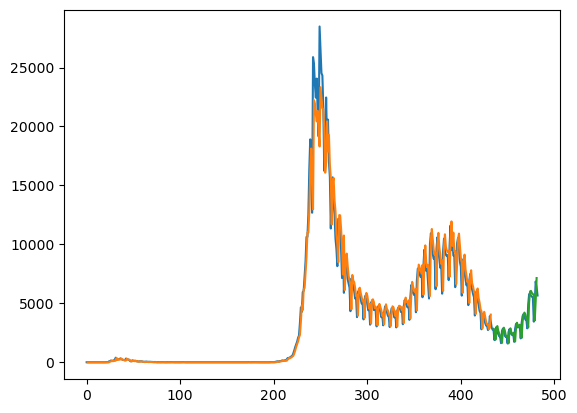

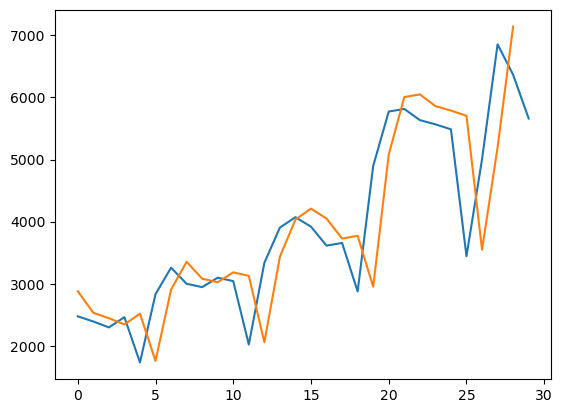

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
44/44 [==============================] - 7s 39ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/5000
44/44 [==========================

Epoch 56/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.8560e-04 - val_mse: 8.8560e-04
Epoch 57/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.6470e-04 - val_mse: 8.6470e-04
Epoch 58/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.4208e-04 - val_mse: 8.4208e-04
Epoch 59/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.2818e-04 - val_mse: 8.2818e-04
Epoch 60/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.3419e-04 - val_mse: 8.3419e-04
Epoch 61/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.0055e-04 - val_mse: 8.0055e-04
Epoch 62/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.0696e-04 - val_mse: 8.0696e-04
Epoch 6

Epoch 114/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 6.7758e-04 - val_mse: 6.7758e-04
Epoch 115/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 6.7455e-04 - val_mse: 6.7455e-04
Epoch 116/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7790e-04 - val_mse: 6.7790e-04
Epoch 117/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7877e-04 - val_mse: 6.7877e-04
Epoch 118/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7798e-04 - val_mse: 6.7798e-04
Epoch 119/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.7952e-04 - val_mse: 6.7952e-04
Epoch 120/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 6.8110e-04 - val_mse: 6.8110e-04
Epoc

44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.5260e-04 - val_mse: 7.5260e-04
Epoch 229/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4331e-04 - val_mse: 7.4331e-04
Epoch 230/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4074e-04 - val_mse: 7.4074e-04
Epoch 231/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4322e-04 - val_mse: 7.4322e-04
Epoch 232/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4018e-04 - val_mse: 7.4018e-04
Epoch 233/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4208e-04 - val_mse: 7.4208e-04
Epoch 234/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.3820e-04 - val_mse: 7.3820e-04
Epoch 235/5000
44

44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4277e-04 - val_mse: 7.4277e-04
Epoch 343/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4401e-04 - val_mse: 7.4401e-04
Epoch 344/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4070e-04 - val_mse: 7.4070e-04
Epoch 345/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 7.4250e-04 - val_mse: 7.4250e-04
Epoch 346/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5222e-04 - val_mse: 7.5222e-04
Epoch 347/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5311e-04 - val_mse: 7.5311e-04
Epoch 348/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4757e-04 - val_mse: 7.4757e-04
Epoch 349/5000
44/

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4374e-04 - val_mse: 7.4374e-04
Epoch 457/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4514e-04 - val_mse: 7.4514e-04
Epoch 458/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5182e-04 - val_mse: 7.5182e-04
Epoch 459/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4337e-04 - val_mse: 7.4337e-04
Epoch 460/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5056e-04 - val_mse: 7.5056e-04
Epoch 461/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4304e-04 - val_mse: 7.4304e-04
Epoch 462/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.6092e-04 - val_mse: 7.6092e-04
Epoch 463/5000
44/

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4810e-04 - val_mse: 7.4810e-04
Epoch 571/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4403e-04 - val_mse: 7.4403e-04
Epoch 572/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4154e-04 - val_mse: 7.4154e-04
Epoch 573/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3804e-04 - val_mse: 7.3804e-04
Epoch 574/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4539e-04 - val_mse: 7.4539e-04
Epoch 575/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4445e-04 - val_mse: 7.4445e-04
Epoch 576/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4538e-04 - val_mse: 7.4538e-04
Epoch 577/5000
44/4

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4907e-04 - val_mse: 7.4907e-04
Epoch 685/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4946e-04 - val_mse: 7.4946e-04
Epoch 686/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4485e-04 - val_mse: 7.4485e-04
Epoch 687/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4092e-04 - val_mse: 7.4092e-04
Epoch 688/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4374e-04 - val_mse: 7.4374e-04
Epoch 689/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4633e-04 - val_mse: 7.4633e-04
Epoch 690/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4674e-04 - val_mse: 7.4674e-04
Epoch 691/5000
44/44

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5041e-04 - val_mse: 7.5041e-04
Epoch 799/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4621e-04 - val_mse: 7.4621e-04
Epoch 800/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3945e-04 - val_mse: 7.3945e-04
Epoch 801/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3633e-04 - val_mse: 7.3633e-04
Epoch 802/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4043e-04 - val_mse: 7.4043e-04
Epoch 803/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4771e-04 - val_mse: 7.4771e-04
Epoch 804/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4523e-04 - val_mse: 7.4523e-04
Epoch 805/5000
44

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4283e-04 - val_mse: 7.4283e-04
Epoch 913/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4758e-04 - val_mse: 7.4758e-04
Epoch 914/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5015e-04 - val_mse: 7.5015e-04
Epoch 915/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4175e-04 - val_mse: 7.4175e-04
Epoch 916/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3625e-04 - val_mse: 7.3625e-04
Epoch 917/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4001e-04 - val_mse: 7.4001e-04
Epoch 918/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3806e-04 - val_mse: 7.3806e-04
Epoch 919/5000
44/

44/44 [==============================] - 1s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4525e-04 - val_mse: 7.4525e-04
Epoch 1027/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4525e-04 - val_mse: 7.4525e-04
Epoch 1028/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3528e-04 - val_mse: 7.3528e-04
Epoch 1029/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3908e-04 - val_mse: 7.3908e-04
Epoch 1030/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3577e-04 - val_mse: 7.3577e-04
Epoch 1031/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4637e-04 - val_mse: 7.4637e-04
Epoch 1032/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4695e-04 - val_mse: 7.4695e-04
Epoch 1033

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4541e-04 - val_mse: 7.4541e-04
Epoch 1141/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3843e-04 - val_mse: 7.3843e-04
Epoch 1142/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3323e-04 - val_mse: 7.3323e-04
Epoch 1143/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3997e-04 - val_mse: 7.3997e-04
Epoch 1144/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4385e-04 - val_mse: 7.4385e-04
Epoch 1145/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4395e-04 - val_mse: 7.4395e-04
Epoch 1146/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3853e-04 - val_mse: 7.3853e-04
Epoch 1147

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3937e-04 - val_mse: 7.3937e-04
Epoch 1255/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3987e-04 - val_mse: 7.3987e-04
Epoch 1256/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4004e-04 - val_mse: 7.4004e-04
Epoch 1257/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4145e-04 - val_mse: 7.4145e-04
Epoch 1258/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5149e-04 - val_mse: 7.5149e-04
Epoch 1259/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4407e-04 - val_mse: 7.4407e-04
Epoch 1260/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3719e-04 - val_mse: 7.3719e-04
Epoch 1261/50

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3854e-04 - val_mse: 7.3854e-04
Epoch 1369/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3317e-04 - val_mse: 7.3317e-04
Epoch 1370/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3469e-04 - val_mse: 7.3469e-04
Epoch 1371/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3625e-04 - val_mse: 7.3625e-04
Epoch 1372/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4320e-04 - val_mse: 7.4320e-04
Epoch 1373/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4181e-04 - val_mse: 7.4181e-04
Epoch 1374/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3891e-04 - val_mse: 7.3891e-04
Epoch 1375/5

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3632e-04 - val_mse: 7.3632e-04
Epoch 1483/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3249e-04 - val_mse: 7.3249e-04
Epoch 1484/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3327e-04 - val_mse: 7.3327e-04
Epoch 1485/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4279e-04 - val_mse: 7.4279e-04
Epoch 1486/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4082e-04 - val_mse: 7.4082e-04
Epoch 1487/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3700e-04 - val_mse: 7.3700e-04
Epoch 1488/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4195e-04 - val_mse: 7.4195e-04
Epoch 14

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3273e-04 - val_mse: 7.3273e-04
Epoch 1597/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3638e-04 - val_mse: 7.3638e-04
Epoch 1598/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3669e-04 - val_mse: 7.3669e-04
Epoch 1599/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3284e-04 - val_mse: 7.3284e-04
Epoch 1600/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3402e-04 - val_mse: 7.3402e-04
Epoch 1601/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3509e-04 - val_mse: 7.3509e-04
Epoch 1602/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4075e-04 - val_mse: 7.4075e-04
Epoch 1603

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3937e-04 - val_mse: 7.3937e-04
Epoch 1711/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3553e-04 - val_mse: 7.3553e-04
Epoch 1712/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3562e-04 - val_mse: 7.3562e-04
Epoch 1713/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4011e-04 - val_mse: 7.4011e-04
Epoch 1714/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3786e-04 - val_mse: 7.3786e-04
Epoch 1715/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2950e-04 - val_mse: 7.2950e-04
Epoch 1716/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3579e-04 - val_mse: 7.3579e-04
Epoch 1717

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3001e-04 - val_mse: 7.3001e-04
Epoch 1825/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3417e-04 - val_mse: 7.3417e-04
Epoch 1826/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3988e-04 - val_mse: 7.3988e-04
Epoch 1827/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3374e-04 - val_mse: 7.3374e-04
Epoch 1828/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3665e-04 - val_mse: 7.3665e-04
Epoch 1829/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2834e-04 - val_mse: 7.2834e-04
Epoch 1830/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3255e-04 - val_mse: 7.3255e-04
Epoch 1831

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4015e-04 - val_mse: 7.4015e-04
Epoch 1939/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3695e-04 - val_mse: 7.3695e-04
Epoch 1940/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4242e-04 - val_mse: 7.4242e-04
Epoch 1941/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3486e-04 - val_mse: 7.3486e-04
Epoch 1942/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3578e-04 - val_mse: 7.3578e-04
Epoch 1943/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3341e-04 - val_mse: 7.3341e-04
Epoch 1944/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3296e-04 - val_mse: 7.3296e-04
Epoch 1945/5

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3432e-04 - val_mse: 7.3432e-04
Epoch 2053/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3303e-04 - val_mse: 7.3303e-04
Epoch 2054/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3515e-04 - val_mse: 7.3515e-04
Epoch 2055/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3496e-04 - val_mse: 7.3496e-04
Epoch 2056/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3337e-04 - val_mse: 7.3337e-04
Epoch 2057/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3516e-04 - val_mse: 7.3516e-04
Epoch 2058/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3365e-04 - val_mse: 7.3365e-04
Epoch 2059/

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3755e-04 - val_mse: 7.3755e-04
Epoch 2167/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2980e-04 - val_mse: 7.2980e-04
Epoch 2168/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2963e-04 - val_mse: 7.2963e-04
Epoch 2169/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3100e-04 - val_mse: 7.3100e-04
Epoch 2170/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3001e-04 - val_mse: 7.3001e-04
Epoch 2171/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3236e-04 - val_mse: 7.3236e-04
Epoch 2172/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3638e-04 - val_mse: 7.3638e-04
Epoch 217

44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.4296e-04 - val_mse: 7.4296e-04
Epoch 2281/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3770e-04 - val_mse: 7.3770e-04
Epoch 2282/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5256e-04 - val_mse: 7.5256e-04
Epoch 2283/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3858e-04 - val_mse: 7.3858e-04
Epoch 2284/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3679e-04 - val_mse: 7.3679e-04
Epoch 2285/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3843e-04 - val_mse: 7.3843e-04
Epoch 2286/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3400e-04 - val_mse: 7.3400e-04
Epoch 22

44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2776e-04 - val_mse: 7.2776e-04
Epoch 2338/5000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3079e-04 - val_mse: 7.3079e-04
Epoch 2339/5000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3355e-04 - val_mse: 7.3355e-04
Epoch 2340/5000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3613e-04 - val_mse: 7.3613e-04
Epoch 2341/5000
44/44 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3041e-04 - val_mse: 7.3041e-04
Epoch 2342/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3315e-04 - val_mse: 7.3315e-04
Epoch 2343/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2918e-04 - val_mse: 7.2918e-04
Epoch 2344/50

44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2767e-04 - val_mse: 7.2767e-04
Epoch 2395/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2863e-04 - val_mse: 7.2863e-04
Epoch 2396/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2914e-04 - val_mse: 7.2914e-04
Epoch 2397/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3015e-04 - val_mse: 7.3015e-04
Epoch 2398/5000
44/44 [==============================] - 1s 22ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3430e-04 - val_mse: 7.3430e-04
Epoch 2399/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3242e-04 - val_mse: 7.3242e-04
Epoch 2400/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3262e-04 - val_mse: 7.3262e-04
Epoch 2401/

44/44 [==============================] - 1s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3365e-04 - val_mse: 7.3365e-04
Epoch 2452/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2876e-04 - val_mse: 7.2876e-04
Epoch 2453/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3252e-04 - val_mse: 7.3252e-04
Epoch 2454/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2578e-04 - val_mse: 7.2578e-04
Epoch 2455/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2726e-04 - val_mse: 7.2726e-04
Epoch 2456/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2932e-04 - val_mse: 7.2932e-04
Epoch 2457/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2895e-04 - val_mse: 7.2895e-04
Epoch 24

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2917e-04 - val_mse: 7.2917e-04
Epoch 2566/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2840e-04 - val_mse: 7.2840e-04
Epoch 2567/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2640e-04 - val_mse: 7.2640e-04
Epoch 2568/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2892e-04 - val_mse: 7.2892e-04
Epoch 2569/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3021e-04 - val_mse: 7.3021e-04
Epoch 2570/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2600e-04 - val_mse: 7.2600e-04
Epoch 2571/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2477e-04 - val_mse: 7.2477e-04
Epoch 2572/500

44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3132e-04 - val_mse: 7.3132e-04
Epoch 2680/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3376e-04 - val_mse: 7.3376e-04
Epoch 2681/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2898e-04 - val_mse: 7.2898e-04
Epoch 2682/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3043e-04 - val_mse: 7.3043e-04
Epoch 2683/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3057e-04 - val_mse: 7.3057e-04
Epoch 2684/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2417e-04 - val_mse: 7.2417e-04
Epoch 2685/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2953e-04 - val_mse: 7.2953e-04
Epoch 2686/50

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2851e-04 - val_mse: 7.2851e-04
Epoch 2794/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3045e-04 - val_mse: 7.3045e-04
Epoch 2795/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3465e-04 - val_mse: 7.3465e-04
Epoch 2796/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2916e-04 - val_mse: 7.2916e-04
Epoch 2797/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3178e-04 - val_mse: 7.3178e-04
Epoch 2798/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3328e-04 - val_mse: 7.3328e-04
Epoch 2799/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3419e-04 - val_mse: 7.3419e-04
Epoch 280

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2577e-04 - val_mse: 7.2577e-04
Epoch 2908/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2748e-04 - val_mse: 7.2748e-04
Epoch 2909/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3493e-04 - val_mse: 7.3493e-04
Epoch 2910/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3191e-04 - val_mse: 7.3191e-04
Epoch 2911/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2877e-04 - val_mse: 7.2877e-04
Epoch 2912/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3260e-04 - val_mse: 7.3260e-04
Epoch 2913/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2770e-04 - val_mse: 7.2770e-04
Epoch 2914/

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3050e-04 - val_mse: 7.3050e-04
Epoch 3022/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2918e-04 - val_mse: 7.2918e-04
Epoch 3023/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2475e-04 - val_mse: 7.2475e-04
Epoch 3024/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2662e-04 - val_mse: 7.2662e-04
Epoch 3025/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2389e-04 - val_mse: 7.2389e-04
Epoch 3026/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2520e-04 - val_mse: 7.2520e-04
Epoch 3027/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2407e-04 - val_mse: 7.2407e-04
Epoch 3028/50

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2458e-04 - val_mse: 7.2458e-04
Epoch 3136/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3118e-04 - val_mse: 7.3118e-04
Epoch 3137/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3231e-04 - val_mse: 7.3231e-04
Epoch 3138/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2955e-04 - val_mse: 7.2955e-04
Epoch 3139/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2877e-04 - val_mse: 7.2877e-04
Epoch 3140/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2935e-04 - val_mse: 7.2935e-04
Epoch 3141/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2620e-04 - val_mse: 7.2620e-04
Epoch 3142/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2895e-04 - val_mse: 7.2895e-04
Epoch 3250/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2343e-04 - val_mse: 7.2343e-04
Epoch 3251/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3224e-04 - val_mse: 7.3224e-04
Epoch 3252/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3078e-04 - val_mse: 7.3078e-04
Epoch 3253/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3296e-04 - val_mse: 7.3296e-04
Epoch 3254/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2600e-04 - val_mse: 7.2600e-04
Epoch 3255/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2622e-04 - val_mse: 7.2622e-04
Epoch 3256/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2473e-04 - val_mse: 7.2473e-04
Epoch 3364/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2757e-04 - val_mse: 7.2757e-04
Epoch 3365/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2397e-04 - val_mse: 7.2397e-04
Epoch 3366/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2824e-04 - val_mse: 7.2824e-04
Epoch 3367/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2174e-04 - val_mse: 7.2174e-04
Epoch 3368/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3025e-04 - val_mse: 7.3025e-04
Epoch 3369/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2332e-04 - val_mse: 7.2332e-04
Epoch 3370/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3362e-04 - val_mse: 7.3362e-04
Epoch 3478/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2700e-04 - val_mse: 7.2700e-04
Epoch 3479/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2621e-04 - val_mse: 7.2621e-04
Epoch 3480/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2761e-04 - val_mse: 7.2761e-04
Epoch 3481/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3029e-04 - val_mse: 7.3029e-04
Epoch 3482/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2397e-04 - val_mse: 7.2397e-04
Epoch 3483/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2480e-04 - val_mse: 7.2480e-04
Epoch 3484/5000

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1998e-04 - val_mse: 7.1998e-04
Epoch 3592/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2727e-04 - val_mse: 7.2727e-04
Epoch 3593/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2569e-04 - val_mse: 7.2569e-04
Epoch 3594/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2722e-04 - val_mse: 7.2722e-04
Epoch 3595/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2847e-04 - val_mse: 7.2847e-04
Epoch 3596/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2229e-04 - val_mse: 7.2229e-04
Epoch 3597/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2618e-04 - val_mse: 7.2618e-04
Epoch 3598/50

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2564e-04 - val_mse: 7.2564e-04
Epoch 3706/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2417e-04 - val_mse: 7.2417e-04
Epoch 3707/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2854e-04 - val_mse: 7.2854e-04
Epoch 3708/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2417e-04 - val_mse: 7.2417e-04
Epoch 3709/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2744e-04 - val_mse: 7.2744e-04
Epoch 3710/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2765e-04 - val_mse: 7.2765e-04
Epoch 3711/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2116e-04 - val_mse: 7.2116e-04
Epoch 3712/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3028e-04 - val_mse: 7.3028e-04
Epoch 3820/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2696e-04 - val_mse: 7.2696e-04
Epoch 3821/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2690e-04 - val_mse: 7.2690e-04
Epoch 3822/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2163e-04 - val_mse: 7.2163e-04
Epoch 3823/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2510e-04 - val_mse: 7.2510e-04
Epoch 3824/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2827e-04 - val_mse: 7.2827e-04
Epoch 3825/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2635e-04 - val_mse: 7.2635e-04
Epoch 3826/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1995e-04 - val_mse: 7.1995e-04
Epoch 3934/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2116e-04 - val_mse: 7.2116e-04
Epoch 3935/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2612e-04 - val_mse: 7.2612e-04
Epoch 3936/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2211e-04 - val_mse: 7.2211e-04
Epoch 3937/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2435e-04 - val_mse: 7.2435e-04
Epoch 3938/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2303e-04 - val_mse: 7.2303e-04
Epoch 3939/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1892e-04 - val_mse: 7.1892e-04
Epoch 3940/5000

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.3477e-04 - val_mse: 7.3477e-04
Epoch 4048/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2030e-04 - val_mse: 7.2030e-04
Epoch 4049/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1888e-04 - val_mse: 7.1888e-04
Epoch 4050/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2213e-04 - val_mse: 7.2213e-04
Epoch 4051/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2273e-04 - val_mse: 7.2273e-04
Epoch 4052/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2213e-04 - val_mse: 7.2213e-04
Epoch 4053/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1835e-04 - val_mse: 7.1835e-04
Epoch 40

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2312e-04 - val_mse: 7.2312e-04
Epoch 4105/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2802e-04 - val_mse: 7.2802e-04
Epoch 4106/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2071e-04 - val_mse: 7.2071e-04
Epoch 4107/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2223e-04 - val_mse: 7.2223e-04
Epoch 4108/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2164e-04 - val_mse: 7.2164e-04
Epoch 4109/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2233e-04 - val_mse: 7.2233e-04
Epoch 4110/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2428e-04 - val_mse: 7.2428e-04
Epoch 4111/50

44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2016e-04 - val_mse: 7.2016e-04
Epoch 4219/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2077e-04 - val_mse: 7.2077e-04
Epoch 4220/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2033e-04 - val_mse: 7.2033e-04
Epoch 4221/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2053e-04 - val_mse: 7.2053e-04
Epoch 4222/5000
44/44 [==============================] - 1s 17ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1904e-04 - val_mse: 7.1904e-04
Epoch 4223/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2138e-04 - val_mse: 7.2138e-04
Epoch 4224/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2851e-04 - val_mse: 7.2851e-04
Epoch 42

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2253e-04 - val_mse: 7.2253e-04
Epoch 4333/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2243e-04 - val_mse: 7.2243e-04
Epoch 4334/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1833e-04 - val_mse: 7.1833e-04
Epoch 4335/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2260e-04 - val_mse: 7.2260e-04
Epoch 4336/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2323e-04 - val_mse: 7.2323e-04
Epoch 4337/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1944e-04 - val_mse: 7.1944e-04
Epoch 4338/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2161e-04 - val_mse: 7.2161e-04
Epoch 4339/5000

44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1967e-04 - val_mse: 7.1967e-04
Epoch 4447/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2743e-04 - val_mse: 7.2743e-04
Epoch 4448/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1831e-04 - val_mse: 7.1831e-04
Epoch 4449/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1832e-04 - val_mse: 7.1832e-04
Epoch 4450/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1926e-04 - val_mse: 7.1926e-04
Epoch 4451/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1866e-04 - val_mse: 7.1866e-04
Epoch 4452/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1865e-04 - val_mse: 7.1865e-04
Epoch 44

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2164e-04 - val_mse: 7.2164e-04
Epoch 4504/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2211e-04 - val_mse: 7.2211e-04
Epoch 4505/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2141e-04 - val_mse: 7.2141e-04
Epoch 4506/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2109e-04 - val_mse: 7.2109e-04
Epoch 4507/5000
44/44 [==============================] - 1s 20ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1836e-04 - val_mse: 7.1836e-04
Epoch 4508/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1670e-04 - val_mse: 7.1670e-04
Epoch 4509/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2008e-04 - val_mse: 7.2008e-04
Epoch 451

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2240e-04 - val_mse: 7.2240e-04
Epoch 4618/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2310e-04 - val_mse: 7.2310e-04
Epoch 4619/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2010e-04 - val_mse: 7.2010e-04
Epoch 4620/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1861e-04 - val_mse: 7.1861e-04
Epoch 4621/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2197e-04 - val_mse: 7.2197e-04
Epoch 4622/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1703e-04 - val_mse: 7.1703e-04
Epoch 4623/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1809e-04 - val_mse: 7.1809e-04
Epoch 4624/500

44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2306e-04 - val_mse: 7.2306e-04
Epoch 4732/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2215e-04 - val_mse: 7.2215e-04
Epoch 4733/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2173e-04 - val_mse: 7.2173e-04
Epoch 4734/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1882e-04 - val_mse: 7.1882e-04
Epoch 4735/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1849e-04 - val_mse: 7.1849e-04
Epoch 4736/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1836e-04 - val_mse: 7.1836e-04
Epoch 4737/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2205e-04 - val_mse: 7.2205e-04
Epoch 4738/5

44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2025e-04 - val_mse: 7.2025e-04
Epoch 4846/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.2317e-04 - val_mse: 7.2317e-04
Epoch 4847/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2104e-04 - val_mse: 7.2104e-04
Epoch 4848/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.2043e-04 - val_mse: 7.2043e-04
Epoch 4849/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1889e-04 - val_mse: 7.1889e-04
Epoch 4850/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1793e-04 - val_mse: 7.1793e-04
Epoch 4851/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.2259e-04 - val_mse: 7.2259e-04
Epoch 4852/5

44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.2080e-04 - val_mse: 7.2080e-04
Epoch 4960/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1989e-04 - val_mse: 7.1989e-04
Epoch 4961/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1764e-04 - val_mse: 7.1764e-04
Epoch 4962/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1590e-04 - val_mse: 7.1590e-04
Epoch 4963/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1639e-04 - val_mse: 7.1639e-04
Epoch 4964/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.1520e-04 - val_mse: 7.1520e-04
Epoch 4965/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.1724e-04 - val_mse: 7.1724e-04
Epoch 4966/500

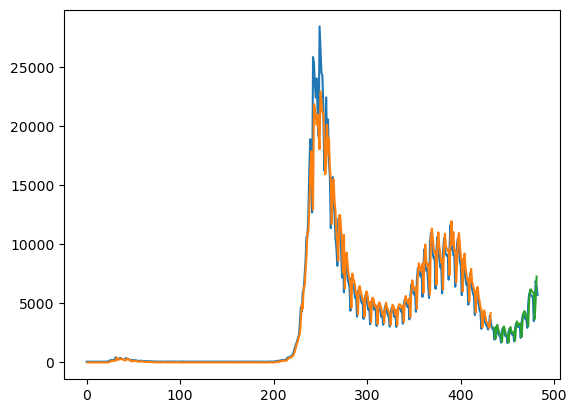

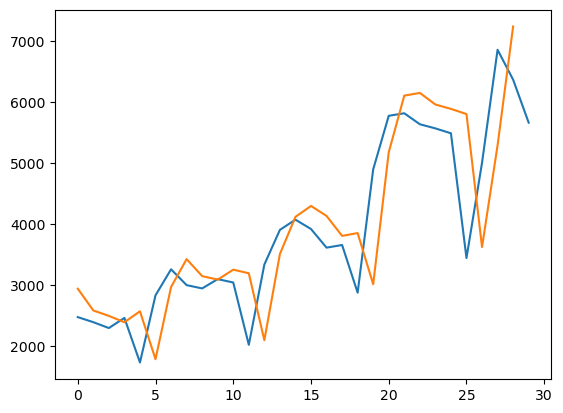

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense (Dense)               (None, 1, 64)             4160      
                                                                 
 lstm (LSTM)                 (None, 1, 64)             33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-traina

Epoch 53/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 54/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 55/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 56/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 57/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/5000
44/44 [==============================] - 0s 9ms/step

44/44 [==============================] - 0s 9ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.6001e-04 - val_mse: 9.6001e-04
Epoch 114/5000
44/44 [==============================] - 1s 18ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9429e-04 - val_mse: 8.9429e-04
Epoch 115/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.2540e-04 - val_mse: 9.2540e-04
Epoch 116/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9155e-04 - val_mse: 8.9155e-04
Epoch 117/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 9.1534e-04 - val_mse: 9.1534e-04
Epoch 118/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.9151e-04 - val_mse: 8.9151e-04
Epoch 119/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.7729e-04 - val_mse: 8.7729e-04
Epoch 120/5000
4

44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2563e-04 - val_mse: 7.2563e-04
Epoch 171/5000
44/44 [==============================] - 1s 23ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2534e-04 - val_mse: 7.2534e-04
Epoch 172/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5429e-04 - val_mse: 7.5429e-04
Epoch 173/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5597e-04 - val_mse: 7.5597e-04
Epoch 174/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.2701e-04 - val_mse: 7.2701e-04
Epoch 175/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.5464e-04 - val_mse: 7.5464e-04
Epoch 176/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 7.6144e-04 - val_mse: 7.6144e-04
Epoch 177/5000

44/44 [==============================] - 0s 11ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0045e-04 - val_mse: 7.0045e-04
Epoch 228/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0505e-04 - val_mse: 7.0505e-04
Epoch 229/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0642e-04 - val_mse: 7.0642e-04
Epoch 230/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0179e-04 - val_mse: 7.0179e-04
Epoch 231/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0097e-04 - val_mse: 7.0097e-04
Epoch 232/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0055e-04 - val_mse: 7.0055e-04
Epoch 233/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 7.0193e-04 - val_mse: 7.0193e-04
Epoch 234/5000
4

Epoch 285/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0833e-04 - val_mse: 7.0833e-04
Epoch 286/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.2047e-04 - val_mse: 7.2047e-04
Epoch 287/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1194e-04 - val_mse: 7.1194e-04
Epoch 288/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0754e-04 - val_mse: 7.0754e-04
Epoch 289/5000
44/44 [==============================] - 0s 9ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1332e-04 - val_mse: 7.1332e-04
Epoch 290/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0594e-04 - val_mse: 7.0594e-04
Epoch 291/5000
44/44 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.0690e-04 - val_mse: 7.0690e-04
Epoch 

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1899e-04 - val_mse: 7.1899e-04
Epoch 343/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1920e-04 - val_mse: 7.1920e-04
Epoch 344/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.1741e-04 - val_mse: 7.1741e-04
Epoch 345/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4845e-04 - val_mse: 7.4845e-04
Epoch 346/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3403e-04 - val_mse: 7.3403e-04
Epoch 347/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5758e-04 - val_mse: 7.5758e-04
Epoch 348/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3510e-04 - val_mse: 7.3510e-04
Epoch 349/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5022e-04 - val_mse: 7.5022e-04
Epoch 400/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4076e-04 - val_mse: 7.4076e-04
Epoch 401/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4650e-04 - val_mse: 7.4650e-04
Epoch 402/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3479e-04 - val_mse: 7.3479e-04
Epoch 403/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.3670e-04 - val_mse: 7.3670e-04
Epoch 404/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5126e-04 - val_mse: 7.5126e-04
Epoch 405/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7730e-04 - val_mse: 7.7730e-04
Epoch 406/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6341e-04 - val_mse: 7.6341e-04
Epoch 457/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8791e-04 - val_mse: 7.8791e-04
Epoch 458/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7435e-04 - val_mse: 7.7435e-04
Epoch 459/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6386e-04 - val_mse: 7.6386e-04
Epoch 460/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5283e-04 - val_mse: 7.5283e-04
Epoch 461/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6012e-04 - val_mse: 7.6012e-04
Epoch 462/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8626e-04 - val_mse: 7.8626e-04
Epoch 463/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6167e-04 - val_mse: 7.6167e-04
Epoch 514/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6194e-04 - val_mse: 7.6194e-04
Epoch 515/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6339e-04 - val_mse: 7.6339e-04
Epoch 516/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7232e-04 - val_mse: 7.7232e-04
Epoch 517/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0198e-04 - val_mse: 8.0198e-04
Epoch 518/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7775e-04 - val_mse: 7.7775e-04
Epoch 519/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7010e-04 - val_mse: 7.7010e-04
Epoch 520/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8513e-04 - val_mse: 7.8513e-04
Epoch 571/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8831e-04 - val_mse: 7.8831e-04
Epoch 572/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6011e-04 - val_mse: 7.6011e-04
Epoch 573/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7207e-04 - val_mse: 7.7207e-04
Epoch 574/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1941e-04 - val_mse: 8.1941e-04
Epoch 575/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9973e-04 - val_mse: 7.9973e-04
Epoch 576/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6678e-04 - val_mse: 7.6678e-04
Epoch 577/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9528e-04 - val_mse: 7.9528e-04
Epoch 628/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1266e-04 - val_mse: 8.1266e-04
Epoch 629/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5635e-04 - val_mse: 7.5635e-04
Epoch 630/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9055e-04 - val_mse: 7.9055e-04
Epoch 631/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0223e-04 - val_mse: 8.0223e-04
Epoch 632/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0496e-04 - val_mse: 8.0496e-04
Epoch 633/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2129e-04 - val_mse: 8.2129e-04
Epoch 634/5000

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1557e-04 - val_mse: 8.1557e-04
Epoch 685/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4264e-04 - val_mse: 8.4264e-04
Epoch 686/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8956e-04 - val_mse: 7.8956e-04
Epoch 687/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6840e-04 - val_mse: 7.6840e-04
Epoch 688/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0230e-04 - val_mse: 8.0230e-04
Epoch 689/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9342e-04 - val_mse: 7.9342e-04
Epoch 690/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3110e-04 - val_mse: 8.3110e-04
Epoch 691/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0074e-04 - val_mse: 8.0074e-04
Epoch 742/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7774e-04 - val_mse: 7.7774e-04
Epoch 743/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0002e-04 - val_mse: 8.0002e-04
Epoch 744/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1879e-04 - val_mse: 8.1879e-04
Epoch 745/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9771e-04 - val_mse: 7.9771e-04
Epoch 746/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9043e-04 - val_mse: 7.9043e-04
Epoch 747/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1197e-04 - val_mse: 8.1197e-04
Epoch 748/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4016e-04 - val_mse: 8.4016e-04
Epoch 799/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0127e-04 - val_mse: 8.0127e-04
Epoch 800/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0634e-04 - val_mse: 8.0634e-04
Epoch 801/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5821e-04 - val_mse: 7.5821e-04
Epoch 802/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9945e-04 - val_mse: 7.9945e-04
Epoch 803/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2507e-04 - val_mse: 8.2507e-04
Epoch 804/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3645e-04 - val_mse: 8.3645e-04
Epoch 805/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1223e-04 - val_mse: 8.1223e-04
Epoch 856/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1434e-04 - val_mse: 8.1434e-04
Epoch 857/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1820e-04 - val_mse: 8.1820e-04
Epoch 858/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7714e-04 - val_mse: 7.7714e-04
Epoch 859/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0274e-04 - val_mse: 8.0274e-04
Epoch 860/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0814e-04 - val_mse: 8.0814e-04
Epoch 861/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1008e-04 - val_mse: 8.1008e-04
Epoch 862/5000

44/44 [==============================] - 1s 16ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1426e-04 - val_mse: 8.1426e-04
Epoch 913/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4592e-04 - val_mse: 8.4592e-04
Epoch 914/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4938e-04 - val_mse: 8.4938e-04
Epoch 915/5000
44/44 [==============================] - 1s 20ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7082e-04 - val_mse: 7.7082e-04
Epoch 916/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9273e-04 - val_mse: 7.9273e-04
Epoch 917/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0461e-04 - val_mse: 8.0461e-04
Epoch 918/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1343e-04 - val_mse: 8.1343e-04
Epoch 919/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2356e-04 - val_mse: 8.2356e-04
Epoch 970/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8901e-04 - val_mse: 7.8901e-04
Epoch 971/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4286e-04 - val_mse: 8.4286e-04
Epoch 972/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8009e-04 - val_mse: 8.8009e-04
Epoch 973/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3302e-04 - val_mse: 8.3302e-04
Epoch 974/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2493e-04 - val_mse: 8.2493e-04
Epoch 975/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5171e-04 - val_mse: 8.5171e-04
Epoch 976/5000

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3383e-04 - val_mse: 8.3383e-04
Epoch 1027/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0861e-04 - val_mse: 8.0861e-04
Epoch 1028/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8782e-04 - val_mse: 7.8782e-04
Epoch 1029/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0367e-04 - val_mse: 8.0367e-04
Epoch 1030/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9986e-04 - val_mse: 7.9986e-04
Epoch 1031/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6000e-04 - val_mse: 8.6000e-04
Epoch 1032/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2677e-04 - val_mse: 8.2677e-04
Epoch 10

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9556e-04 - val_mse: 7.9556e-04
Epoch 1084/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1096e-04 - val_mse: 8.1096e-04
Epoch 1085/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0819e-04 - val_mse: 8.0819e-04
Epoch 1086/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5599e-04 - val_mse: 8.5599e-04
Epoch 1087/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1052e-04 - val_mse: 8.1052e-04
Epoch 1088/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5639e-04 - val_mse: 7.5639e-04
Epoch 1089/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1807e-04 - val_mse: 8.1807e-04
Epoch 10

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5117e-04 - val_mse: 8.5117e-04
Epoch 1141/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7369e-04 - val_mse: 7.7369e-04
Epoch 1142/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9563e-04 - val_mse: 7.9563e-04
Epoch 1143/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0861e-04 - val_mse: 8.0861e-04
Epoch 1144/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4611e-04 - val_mse: 8.4611e-04
Epoch 1145/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4969e-04 - val_mse: 8.4969e-04
Epoch 1146/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9134e-04 - val_mse: 7.9134e-04
Epoch 11

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5539e-04 - val_mse: 8.5539e-04
Epoch 1198/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1956e-04 - val_mse: 8.1956e-04
Epoch 1199/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1535e-04 - val_mse: 8.1535e-04
Epoch 1200/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3098e-04 - val_mse: 8.3098e-04
Epoch 1201/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3098e-04 - val_mse: 8.3098e-04
Epoch 1202/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3575e-04 - val_mse: 8.3575e-04
Epoch 1203/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7624e-04 - val_mse: 8.7624e-04
Epoch 12

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5844e-04 - val_mse: 8.5844e-04
Epoch 1255/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4928e-04 - val_mse: 8.4928e-04
Epoch 1256/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3138e-04 - val_mse: 8.3138e-04
Epoch 1257/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7917e-04 - val_mse: 8.7917e-04
Epoch 1258/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5432e-04 - val_mse: 8.5432e-04
Epoch 1259/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5851e-04 - val_mse: 8.5851e-04
Epoch 1260/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2920e-04 - val_mse: 8.2920e-04
Epoch 12

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6139e-04 - val_mse: 8.6139e-04
Epoch 1312/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5776e-04 - val_mse: 8.5776e-04
Epoch 1313/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7638e-04 - val_mse: 8.7638e-04
Epoch 1314/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1954e-04 - val_mse: 8.1954e-04
Epoch 1315/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.1272e-04 - val_mse: 8.1272e-04
Epoch 1316/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4505e-04 - val_mse: 8.4505e-04
Epoch 1317/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8865e-04 - val_mse: 7.8865e-04
Epoch 13

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3617e-04 - val_mse: 8.3617e-04
Epoch 1369/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7948e-04 - val_mse: 7.7948e-04
Epoch 1370/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9415e-04 - val_mse: 7.9415e-04
Epoch 1371/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6448e-04 - val_mse: 8.6448e-04
Epoch 1372/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2145e-04 - val_mse: 8.2145e-04
Epoch 1373/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7262e-04 - val_mse: 8.7262e-04
Epoch 1374/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7179e-04 - val_mse: 8.7179e-04
Epoch 13

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6716e-04 - val_mse: 8.6716e-04
Epoch 1426/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1926e-04 - val_mse: 8.1926e-04
Epoch 1427/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0528e-04 - val_mse: 8.0528e-04
Epoch 1428/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4647e-04 - val_mse: 8.4647e-04
Epoch 1429/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1280e-04 - val_mse: 8.1280e-04
Epoch 1430/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2512e-04 - val_mse: 8.2512e-04
Epoch 1431/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2044e-04 - val_mse: 8.2044e-04
Epoch 14

44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5244e-04 - val_mse: 8.5244e-04
Epoch 1483/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2180e-04 - val_mse: 8.2180e-04
Epoch 1484/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4672e-04 - val_mse: 8.4673e-04
Epoch 1485/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4572e-04 - val_mse: 8.4572e-04
Epoch 1486/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4841e-04 - val_mse: 8.4841e-04
Epoch 1487/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2891e-04 - val_mse: 8.2891e-04
Epoch 1488/5000
44/44 [==============================] - 1s 17ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7938e-04 - val_mse: 8.7938e-04
Epoch 14

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2224e-04 - val_mse: 8.2224e-04
Epoch 1540/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4592e-04 - val_mse: 8.4592e-04
Epoch 1541/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2165e-04 - val_mse: 8.2165e-04
Epoch 1542/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4301e-04 - val_mse: 8.4301e-04
Epoch 1543/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1370e-04 - val_mse: 8.1370e-04
Epoch 1544/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3273e-04 - val_mse: 8.3273e-04
Epoch 1545/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.0565e-04 - val_mse: 8.0565e-04
Epoch 15

44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4784e-04 - val_mse: 8.4784e-04
Epoch 1597/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4891e-04 - val_mse: 8.4891e-04
Epoch 1598/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9704e-04 - val_mse: 7.9704e-04
Epoch 1599/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3878e-04 - val_mse: 8.3878e-04
Epoch 1600/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5980e-04 - val_mse: 8.5980e-04
Epoch 1601/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5554e-04 - val_mse: 8.5554e-04
Epoch 1602/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2223e-04 - val_mse: 8.2223e-04
Epoch 16

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3889e-04 - val_mse: 8.3889e-04
Epoch 1654/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7488e-04 - val_mse: 8.7488e-04
Epoch 1655/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2203e-04 - val_mse: 8.2203e-04
Epoch 1656/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1771e-04 - val_mse: 8.1771e-04
Epoch 1657/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4485e-04 - val_mse: 8.4485e-04
Epoch 1658/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5448e-04 - val_mse: 8.5448e-04
Epoch 1659/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6273e-04 - val_mse: 8.6273e-04
Epoch 16

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.2991e-04 - val_mse: 9.2991e-04
Epoch 1711/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9613e-04 - val_mse: 7.9613e-04
Epoch 1712/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7329e-04 - val_mse: 8.7329e-04
Epoch 1713/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0388e-04 - val_mse: 9.0388e-04
Epoch 1714/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1179e-04 - val_mse: 8.1179e-04
Epoch 1715/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4322e-04 - val_mse: 8.4322e-04
Epoch 1716/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6150e-04 - val_mse: 8.6150e-04
Epoch 17

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5866e-04 - val_mse: 8.5866e-04
Epoch 1768/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8599e-04 - val_mse: 7.8599e-04
Epoch 1769/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6325e-04 - val_mse: 8.6325e-04
Epoch 1770/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3795e-04 - val_mse: 8.3795e-04
Epoch 1771/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0120e-04 - val_mse: 9.0120e-04
Epoch 1772/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2136e-04 - val_mse: 8.2136e-04
Epoch 1773/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0012e-04 - val_mse: 9.0012e-04
Epoch 17

44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0453e-04 - val_mse: 8.0453e-04
Epoch 1825/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8182e-04 - val_mse: 8.8182e-04
Epoch 1826/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1641e-04 - val_mse: 8.1641e-04
Epoch 1827/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5807e-04 - val_mse: 8.5807e-04
Epoch 1828/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1970e-04 - val_mse: 8.1970e-04
Epoch 1829/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9469e-04 - val_mse: 7.9469e-04
Epoch 1830/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1283e-04 - val_mse: 8.1283e-04
Epoch 18

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3373e-04 - val_mse: 8.3373e-04
Epoch 1882/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3473e-04 - val_mse: 8.3473e-04
Epoch 1883/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8321e-04 - val_mse: 8.8321e-04
Epoch 1884/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7246e-04 - val_mse: 8.7246e-04
Epoch 1885/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4028e-04 - val_mse: 8.4028e-04
Epoch 1886/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6601e-04 - val_mse: 8.6601e-04
Epoch 1887/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3568e-04 - val_mse: 8.3568e-04
Epoch 18

44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0116e-04 - val_mse: 9.0116e-04
Epoch 1939/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5870e-04 - val_mse: 8.5870e-04
Epoch 1940/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0354e-04 - val_mse: 9.0354e-04
Epoch 1941/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2414e-04 - val_mse: 8.2414e-04
Epoch 1942/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4851e-04 - val_mse: 8.4851e-04
Epoch 1943/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4299e-04 - val_mse: 8.4299e-04
Epoch 1944/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0884e-04 - val_mse: 8.0884e-04
Epoch 19

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9723e-04 - val_mse: 8.9723e-04
Epoch 1996/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6383e-04 - val_mse: 8.6383e-04
Epoch 1997/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4410e-04 - val_mse: 8.4410e-04
Epoch 1998/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5886e-04 - val_mse: 8.5886e-04
Epoch 1999/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8638e-04 - val_mse: 7.8638e-04
Epoch 2000/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.9397e-04 - val_mse: 8.9397e-04
Epoch 2001/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3783e-04 - val_mse: 8.3783e-04
Epoch 20

44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5353e-04 - val_mse: 8.5353e-04
Epoch 2053/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8979e-04 - val_mse: 8.8979e-04
Epoch 2054/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8472e-04 - val_mse: 8.8472e-04
Epoch 2055/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5341e-04 - val_mse: 8.5341e-04
Epoch 2056/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5319e-04 - val_mse: 8.5319e-04
Epoch 2057/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4771e-04 - val_mse: 8.4771e-04
Epoch 2058/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2174e-04 - val_mse: 8.2174e-04
Epoch 20

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.1162e-04 - val_mse: 9.1162e-04
Epoch 2110/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6136e-04 - val_mse: 8.6136e-04
Epoch 2111/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4861e-04 - val_mse: 8.4861e-04
Epoch 2112/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2625e-04 - val_mse: 8.2625e-04
Epoch 2113/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.1288e-04 - val_mse: 9.1288e-04
Epoch 2114/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8984e-04 - val_mse: 8.8984e-04
Epoch 2115/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8717e-04 - val_mse: 8.8717e-04
Epoch 21

44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7220e-04 - val_mse: 8.7220e-04
Epoch 2167/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3284e-04 - val_mse: 8.3284e-04
Epoch 2168/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2134e-04 - val_mse: 8.2134e-04
Epoch 2169/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4346e-04 - val_mse: 8.4346e-04
Epoch 2170/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2602e-04 - val_mse: 8.2602e-04
Epoch 2171/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7597e-04 - val_mse: 8.7597e-04
Epoch 2172/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6644e-04 - val_mse: 8.6644e-04
Epoch 21

44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1346e-04 - val_mse: 9.1346e-04
Epoch 2224/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8381e-04 - val_mse: 8.8381e-04
Epoch 2225/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8886e-04 - val_mse: 8.8886e-04
Epoch 2226/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8738e-04 - val_mse: 8.8738e-04
Epoch 2227/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5892e-04 - val_mse: 8.5892e-04
Epoch 2228/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5580e-04 - val_mse: 8.5580e-04
Epoch 2229/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.9026e-04 - val_mse: 7.9026e-04
Epoch 22

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8315e-04 - val_mse: 8.8315e-04
Epoch 2281/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9224e-04 - val_mse: 8.9224e-04
Epoch 2282/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8515e-04 - val_mse: 8.8515e-04
Epoch 2283/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4963e-04 - val_mse: 8.4963e-04
Epoch 2284/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0840e-04 - val_mse: 9.0840e-04
Epoch 2285/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6948e-04 - val_mse: 8.6948e-04
Epoch 2286/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5990e-04 - val_mse: 8.5990e-04
Epoch 22

44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3998e-04 - val_mse: 8.3998e-04
Epoch 2338/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5795e-04 - val_mse: 8.5795e-04
Epoch 2339/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6120e-04 - val_mse: 8.6120e-04
Epoch 2340/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8422e-04 - val_mse: 8.8422e-04
Epoch 2341/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7920e-04 - val_mse: 8.7920e-04
Epoch 2342/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4229e-04 - val_mse: 8.4229e-04
Epoch 2343/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7862e-04 - val_mse: 8.7862e-04
Epoch 23

44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4677e-04 - val_mse: 8.4677e-04
Epoch 2395/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2087e-04 - val_mse: 8.2087e-04
Epoch 2396/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4934e-04 - val_mse: 8.4934e-04
Epoch 2397/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1897e-04 - val_mse: 9.1897e-04
Epoch 2398/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6318e-04 - val_mse: 8.6318e-04
Epoch 2399/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5724e-04 - val_mse: 8.5724e-04
Epoch 2400/5000
44/44 [==============================] - 0s 10ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9087e-04 - val_mse: 8.9087e-04
Epoch 24

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7044e-04 - val_mse: 8.7044e-04
Epoch 2452/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7161e-04 - val_mse: 8.7161e-04
Epoch 2453/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9432e-04 - val_mse: 8.9432e-04
Epoch 2454/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4449e-04 - val_mse: 8.4449e-04
Epoch 2455/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4990e-04 - val_mse: 8.4990e-04
Epoch 2456/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4716e-04 - val_mse: 8.4716e-04
Epoch 2457/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5896e-04 - val_mse: 8.5896e-04
Epoch 24

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3564e-04 - val_mse: 8.3564e-04
Epoch 2509/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2668e-04 - val_mse: 9.2668e-04
Epoch 2510/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3377e-04 - val_mse: 8.3377e-04
Epoch 2511/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4051e-04 - val_mse: 8.4051e-04
Epoch 2512/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4965e-04 - val_mse: 8.4965e-04
Epoch 2513/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0720e-04 - val_mse: 9.0720e-04
Epoch 2514/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.0673e-04 - val_mse: 9.0673e-04
Epoch 25

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.1595e-04 - val_mse: 9.1595e-04
Epoch 2566/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5119e-04 - val_mse: 8.5119e-04
Epoch 2567/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1292e-04 - val_mse: 8.1292e-04
Epoch 2568/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9276e-04 - val_mse: 8.9276e-04
Epoch 2569/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3025e-04 - val_mse: 8.3025e-04
Epoch 2570/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4956e-04 - val_mse: 8.4956e-04
Epoch 2571/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3705e-04 - val_mse: 8.3705e-04
Epoch 25

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4652e-04 - val_mse: 8.4652e-04
Epoch 2623/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4140e-04 - val_mse: 8.4140e-04
Epoch 2624/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6386e-04 - val_mse: 8.6386e-04
Epoch 2625/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8798e-04 - val_mse: 8.8798e-04
Epoch 2626/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8307e-04 - val_mse: 8.8307e-04
Epoch 2627/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5471e-04 - val_mse: 8.5471e-04
Epoch 2628/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5501e-04 - val_mse: 8.5501e-04
Epoch 26

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2238e-04 - val_mse: 9.2238e-04
Epoch 2680/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4014e-04 - val_mse: 8.4014e-04
Epoch 2681/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8565e-04 - val_mse: 8.8565e-04
Epoch 2682/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7770e-04 - val_mse: 8.7770e-04
Epoch 2683/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3044e-04 - val_mse: 8.3044e-04
Epoch 2684/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4676e-04 - val_mse: 8.4676e-04
Epoch 2685/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9726e-04 - val_mse: 8.9726e-04
Epoch 26

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6650e-04 - val_mse: 8.6650e-04
Epoch 2737/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7088e-04 - val_mse: 8.7088e-04
Epoch 2738/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6079e-04 - val_mse: 8.6079e-04
Epoch 2739/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3023e-04 - val_mse: 8.3023e-04
Epoch 2740/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0419e-04 - val_mse: 9.0419e-04
Epoch 2741/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8405e-04 - val_mse: 8.8405e-04
Epoch 2742/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2527e-04 - val_mse: 8.2527e-04
Epoch 27

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4545e-04 - val_mse: 8.4545e-04
Epoch 2794/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.9823e-04 - val_mse: 8.9823e-04
Epoch 2795/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8898e-04 - val_mse: 8.8898e-04
Epoch 2796/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6198e-04 - val_mse: 8.6198e-04
Epoch 2797/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0127e-04 - val_mse: 9.0127e-04
Epoch 2798/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1457e-04 - val_mse: 9.1457e-04
Epoch 2799/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.4370e-04 - val_mse: 9.4370e-04
Epoch 28

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5966e-04 - val_mse: 8.5966e-04
Epoch 2851/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6488e-04 - val_mse: 8.6488e-04
Epoch 2852/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5286e-04 - val_mse: 8.5286e-04
Epoch 2853/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2219e-04 - val_mse: 8.2219e-04
Epoch 2854/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6892e-04 - val_mse: 8.6892e-04
Epoch 2855/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4049e-04 - val_mse: 8.4049e-04
Epoch 2856/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7147e-04 - val_mse: 8.7147e-04
Epoch 28

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4101e-04 - val_mse: 8.4101e-04
Epoch 2908/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5814e-04 - val_mse: 8.5814e-04
Epoch 2909/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7413e-04 - val_mse: 8.7413e-04
Epoch 2910/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6776e-04 - val_mse: 8.6776e-04
Epoch 2911/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.2262e-04 - val_mse: 9.2262e-04
Epoch 2912/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.1113e-04 - val_mse: 9.1113e-04
Epoch 2913/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4503e-04 - val_mse: 8.4503e-04
Epoch 29

44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7701e-04 - val_mse: 8.7701e-04
Epoch 2965/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4549e-04 - val_mse: 8.4549e-04
Epoch 2966/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0251e-04 - val_mse: 9.0251e-04
Epoch 2967/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6291e-04 - val_mse: 8.6291e-04
Epoch 2968/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2698e-04 - val_mse: 8.2698e-04
Epoch 2969/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6061e-04 - val_mse: 8.6061e-04
Epoch 2970/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4412e-04 - val_mse: 8.4412e-04
Epoch 29

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9447e-04 - val_mse: 8.9447e-04
Epoch 3022/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8926e-04 - val_mse: 8.8926e-04
Epoch 3023/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5436e-04 - val_mse: 8.5436e-04
Epoch 3024/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0161e-04 - val_mse: 9.0161e-04
Epoch 3025/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3463e-04 - val_mse: 8.3463e-04
Epoch 3026/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7314e-04 - val_mse: 8.7314e-04
Epoch 3027/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6189e-04 - val_mse: 8.6189e-04
Epoch 30

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7784e-04 - val_mse: 8.7784e-04
Epoch 3079/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8676e-04 - val_mse: 8.8676e-04
Epoch 3080/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7763e-04 - val_mse: 8.7763e-04
Epoch 3081/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6550e-04 - val_mse: 8.6550e-04
Epoch 3082/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1272e-04 - val_mse: 9.1272e-04
Epoch 3083/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8682e-04 - val_mse: 8.8682e-04
Epoch 3084/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.1154e-04 - val_mse: 8.1154e-04
Epoch 30

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6238e-04 - val_mse: 8.6238e-04
Epoch 3136/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9636e-04 - val_mse: 8.9636e-04
Epoch 3137/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.3389e-04 - val_mse: 9.3389e-04
Epoch 3138/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3553e-04 - val_mse: 8.3553e-04
Epoch 3139/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6871e-04 - val_mse: 8.6871e-04
Epoch 3140/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7265e-04 - val_mse: 8.7265e-04
Epoch 3141/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4507e-04 - val_mse: 8.4507e-04
Epoch 31

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0270e-04 - val_mse: 9.0270e-04
Epoch 3193/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6611e-04 - val_mse: 8.6611e-04
Epoch 3194/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2981e-04 - val_mse: 8.2981e-04
Epoch 3195/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7271e-04 - val_mse: 8.7271e-04
Epoch 3196/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7915e-04 - val_mse: 8.7915e-04
Epoch 3197/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7287e-04 - val_mse: 8.7287e-04
Epoch 3198/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7570e-04 - val_mse: 8.7570e-04
Epoch 31

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3011e-04 - val_mse: 8.3011e-04
Epoch 3250/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7000e-04 - val_mse: 8.7000e-04
Epoch 3251/5000
44/44 [==============================] - 1s 18ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.3214e-04 - val_mse: 9.3214e-04
Epoch 3252/5000
44/44 [==============================] - 1s 17ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2600e-04 - val_mse: 9.2600e-04
Epoch 3253/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2676e-04 - val_mse: 9.2676e-04
Epoch 3254/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7837e-04 - val_mse: 8.7837e-04
Epoch 3255/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6066e-04 - val_mse: 8.6066e-04
Epoch 32

44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9187e-04 - val_mse: 8.9187e-04
Epoch 3307/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9044e-04 - val_mse: 8.9044e-04
Epoch 3308/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7530e-04 - val_mse: 8.7530e-04
Epoch 3309/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5152e-04 - val_mse: 8.5152e-04
Epoch 3310/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6544e-04 - val_mse: 8.6544e-04
Epoch 3311/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9572e-04 - val_mse: 8.9572e-04
Epoch 3312/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4462e-04 - val_mse: 8.4462e-04
Epoch 33

44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0778e-04 - val_mse: 9.0778e-04
Epoch 3364/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5491e-04 - val_mse: 8.5491e-04
Epoch 3365/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.1720e-04 - val_mse: 9.1720e-04
Epoch 3366/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7264e-04 - val_mse: 8.7264e-04
Epoch 3367/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8349e-04 - val_mse: 8.8349e-04
Epoch 3368/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0001e-04 - val_mse: 9.0001e-04
Epoch 3369/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7224e-04 - val_mse: 8.7224e-04
Epoch 33

44/44 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.7388e-04 - val_mse: 8.7388e-04
Epoch 3421/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8919e-04 - val_mse: 8.8919e-04
Epoch 3422/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8324e-04 - val_mse: 8.8324e-04
Epoch 3423/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7403e-04 - val_mse: 8.7403e-04
Epoch 3424/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9190e-04 - val_mse: 8.9190e-04
Epoch 3425/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0904e-04 - val_mse: 9.0904e-04
Epoch 3426/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7067e-04 - val_mse: 8.7067e-04
Epoch 34

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6568e-04 - val_mse: 8.6568e-04
Epoch 3478/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5451e-04 - val_mse: 8.5451e-04
Epoch 3479/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8163e-04 - val_mse: 8.8163e-04
Epoch 3480/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8990e-04 - val_mse: 8.8990e-04
Epoch 3481/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2578e-04 - val_mse: 9.2578e-04
Epoch 3482/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8641e-04 - val_mse: 8.8641e-04
Epoch 3483/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5317e-04 - val_mse: 8.5317e-04
Epoch 34

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6978e-04 - val_mse: 8.6978e-04
Epoch 3535/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4914e-04 - val_mse: 8.4914e-04
Epoch 3536/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7255e-04 - val_mse: 8.7255e-04
Epoch 3537/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5010e-04 - val_mse: 8.5009e-04
Epoch 3538/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4912e-04 - val_mse: 8.4912e-04
Epoch 3539/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1773e-04 - val_mse: 9.1773e-04
Epoch 3540/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8227e-04 - val_mse: 8.8227e-04
Epoch 35

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5600e-04 - val_mse: 8.5600e-04
Epoch 3592/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0997e-04 - val_mse: 9.0997e-04
Epoch 3593/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6932e-04 - val_mse: 8.6932e-04
Epoch 3594/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8424e-04 - val_mse: 8.8424e-04
Epoch 3595/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8883e-04 - val_mse: 8.8883e-04
Epoch 3596/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4088e-04 - val_mse: 8.4088e-04
Epoch 3597/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6912e-04 - val_mse: 8.6912e-04
Epoch 35

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6860e-04 - val_mse: 8.6860e-04
Epoch 3649/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0393e-04 - val_mse: 9.0393e-04
Epoch 3650/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5697e-04 - val_mse: 8.5697e-04
Epoch 3651/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0074e-04 - val_mse: 9.0074e-04
Epoch 3652/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8057e-04 - val_mse: 8.8057e-04
Epoch 3653/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5313e-04 - val_mse: 8.5313e-04
Epoch 3654/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9142e-04 - val_mse: 8.9142e-04
Epoch 36

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8272e-04 - val_mse: 8.8272e-04
Epoch 3706/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7126e-04 - val_mse: 8.7126e-04
Epoch 3707/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0745e-04 - val_mse: 9.0745e-04
Epoch 3708/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8388e-04 - val_mse: 8.8388e-04
Epoch 3709/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2975e-04 - val_mse: 9.2975e-04
Epoch 3710/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7229e-04 - val_mse: 8.7229e-04
Epoch 3711/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3064e-04 - val_mse: 8.3064e-04
Epoch 37

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6026e-04 - val_mse: 8.6026e-04
Epoch 3763/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7792e-04 - val_mse: 8.7792e-04
Epoch 3764/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4800e-04 - val_mse: 8.4800e-04
Epoch 3765/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7532e-04 - val_mse: 8.7532e-04
Epoch 3766/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7066e-04 - val_mse: 8.7066e-04
Epoch 3767/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4928e-04 - val_mse: 8.4928e-04
Epoch 3768/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6385e-04 - val_mse: 8.6385e-04
Epoch 37

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8773e-04 - val_mse: 8.8773e-04
Epoch 3820/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1610e-04 - val_mse: 9.1610e-04
Epoch 3821/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5551e-04 - val_mse: 8.5551e-04
Epoch 3822/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7072e-04 - val_mse: 8.7072e-04
Epoch 3823/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9182e-04 - val_mse: 8.9182e-04
Epoch 3824/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7484e-04 - val_mse: 8.7484e-04
Epoch 3825/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7047e-04 - val_mse: 8.7047e-04
Epoch 38

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8395e-04 - val_mse: 8.8395e-04
Epoch 3877/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3344e-04 - val_mse: 8.3344e-04
Epoch 3878/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4299e-04 - val_mse: 8.4299e-04
Epoch 3879/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9479e-04 - val_mse: 8.9479e-04
Epoch 3880/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7840e-04 - val_mse: 8.7840e-04
Epoch 3881/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6492e-04 - val_mse: 8.6492e-04
Epoch 3882/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3442e-04 - val_mse: 8.3442e-04
Epoch 38

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4232e-04 - val_mse: 8.4232e-04
Epoch 3934/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6979e-04 - val_mse: 8.6979e-04
Epoch 3935/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7518e-04 - val_mse: 8.7518e-04
Epoch 3936/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5534e-04 - val_mse: 8.5534e-04
Epoch 3937/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4604e-04 - val_mse: 8.4604e-04
Epoch 3938/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5752e-04 - val_mse: 8.5752e-04
Epoch 3939/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5754e-04 - val_mse: 8.5754e-04
Epoch 39

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2919e-04 - val_mse: 8.2919e-04
Epoch 3991/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6321e-04 - val_mse: 8.6321e-04
Epoch 3992/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7763e-04 - val_mse: 8.7763e-04
Epoch 3993/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6932e-04 - val_mse: 8.6932e-04
Epoch 3994/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7675e-04 - val_mse: 8.7675e-04
Epoch 3995/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0769e-04 - val_mse: 9.0769e-04
Epoch 3996/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8669e-04 - val_mse: 8.8669e-04
Epoch 39

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2217e-04 - val_mse: 8.2217e-04
Epoch 4048/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.9980e-04 - val_mse: 7.9980e-04
Epoch 4049/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3813e-04 - val_mse: 8.3813e-04
Epoch 4050/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7516e-04 - val_mse: 8.7516e-04
Epoch 4051/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3189e-04 - val_mse: 8.3189e-04
Epoch 4052/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7182e-04 - val_mse: 8.7182e-04
Epoch 4053/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5360e-04 - val_mse: 8.5360e-04
Epoch 40

44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1057e-04 - val_mse: 9.1057e-04
Epoch 4105/5000
44/44 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2539e-04 - val_mse: 9.2539e-04
Epoch 4106/5000
44/44 [==============================] - 1s 18ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3784e-04 - val_mse: 8.3784e-04
Epoch 4107/5000
44/44 [==============================] - 1s 18ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8928e-04 - val_mse: 8.8928e-04
Epoch 4108/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8390e-04 - val_mse: 8.8390e-04
Epoch 4109/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8270e-04 - val_mse: 8.8270e-04
Epoch 4110/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0190e-04 - val_mse: 9.0190e-04
Epoch 41

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1497e-04 - val_mse: 9.1497e-04
Epoch 4162/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9288e-04 - val_mse: 8.9288e-04
Epoch 4163/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7836e-04 - val_mse: 8.7836e-04
Epoch 4164/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3481e-04 - val_mse: 8.3481e-04
Epoch 4165/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6499e-04 - val_mse: 8.6499e-04
Epoch 4166/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4700e-04 - val_mse: 8.4700e-04
Epoch 4167/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3117e-04 - val_mse: 8.3117e-04
Epoch 41

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5538e-04 - val_mse: 8.5538e-04
Epoch 4219/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4425e-04 - val_mse: 8.4425e-04
Epoch 4220/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4535e-04 - val_mse: 8.4535e-04
Epoch 4221/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5755e-04 - val_mse: 8.5755e-04
Epoch 4222/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3934e-04 - val_mse: 8.3934e-04
Epoch 4223/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0205e-04 - val_mse: 9.0205e-04
Epoch 4224/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1145e-04 - val_mse: 9.1145e-04
Epoch 42

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4591e-04 - val_mse: 8.4591e-04
Epoch 4276/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4835e-04 - val_mse: 8.4835e-04
Epoch 4277/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8339e-04 - val_mse: 8.8339e-04
Epoch 4278/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.1987e-04 - val_mse: 8.1987e-04
Epoch 4279/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4289e-04 - val_mse: 8.4289e-04
Epoch 4280/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.1879e-04 - val_mse: 8.1879e-04
Epoch 4281/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7968e-04 - val_mse: 8.7968e-04
Epoch 42

44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7377e-04 - val_mse: 8.7377e-04
Epoch 4333/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0854e-04 - val_mse: 8.0854e-04
Epoch 4334/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4145e-04 - val_mse: 8.4145e-04
Epoch 4335/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6438e-04 - val_mse: 8.6438e-04
Epoch 4336/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7572e-04 - val_mse: 8.7572e-04
Epoch 4337/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7164e-04 - val_mse: 8.7164e-04
Epoch 4338/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3292e-04 - val_mse: 8.3292e-04
Epoch 43

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5023e-04 - val_mse: 8.5023e-04
Epoch 4390/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6029e-04 - val_mse: 8.6029e-04
Epoch 4391/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8144e-04 - val_mse: 8.8144e-04
Epoch 4392/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6532e-04 - val_mse: 8.6532e-04
Epoch 4393/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2727e-04 - val_mse: 9.2727e-04
Epoch 4394/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7885e-04 - val_mse: 8.7885e-04
Epoch 4395/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7745e-04 - val_mse: 8.7745e-04
Epoch 43

44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9277e-04 - val_mse: 8.9277e-04
Epoch 4447/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2726e-04 - val_mse: 9.2726e-04
Epoch 4448/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6945e-04 - val_mse: 8.6945e-04
Epoch 4449/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7669e-04 - val_mse: 8.7669e-04
Epoch 4450/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4362e-04 - val_mse: 8.4362e-04
Epoch 4451/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6295e-04 - val_mse: 8.6295e-04
Epoch 4452/5000
44/44 [==============================] - 1s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2763e-04 - val_mse: 8.2763e-04
Epoch 44

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9854e-04 - val_mse: 8.9854e-04
Epoch 4504/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9851e-04 - val_mse: 8.9851e-04
Epoch 4505/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7457e-04 - val_mse: 8.7457e-04
Epoch 4506/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7903e-04 - val_mse: 8.7903e-04
Epoch 4507/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5836e-04 - val_mse: 8.5836e-04
Epoch 4508/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3791e-04 - val_mse: 8.3791e-04
Epoch 4509/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0114e-04 - val_mse: 9.0114e-04
Epoch 45

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8692e-04 - val_mse: 8.8692e-04
Epoch 4561/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6203e-04 - val_mse: 8.6203e-04
Epoch 4562/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3903e-04 - val_mse: 8.3903e-04
Epoch 4563/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9580e-04 - val_mse: 8.9580e-04
Epoch 4564/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3332e-04 - val_mse: 8.3332e-04
Epoch 4565/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0275e-04 - val_mse: 9.0275e-04
Epoch 4566/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.3512e-04 - val_mse: 8.3512e-04
Epoch 45

44/44 [==============================] - 1s 19ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.4301e-04 - val_mse: 8.4301e-04
Epoch 4618/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9165e-04 - val_mse: 8.9165e-04
Epoch 4619/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5130e-04 - val_mse: 8.5130e-04
Epoch 4620/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9785e-04 - val_mse: 8.9785e-04
Epoch 4621/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7554e-04 - val_mse: 8.7554e-04
Epoch 4622/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4549e-04 - val_mse: 8.4549e-04
Epoch 4623/5000
44/44 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7986e-04 - val_mse: 8.7986e-04
Epoch 46

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8509e-04 - val_mse: 8.8509e-04
Epoch 4675/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9673e-04 - val_mse: 8.9673e-04
Epoch 4676/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6894e-04 - val_mse: 8.6894e-04
Epoch 4677/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0754e-04 - val_mse: 9.0754e-04
Epoch 4678/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5060e-04 - val_mse: 8.5060e-04
Epoch 4679/5000
44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8435e-04 - val_mse: 8.8435e-04
Epoch 4680/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1781e-04 - val_mse: 9.1781e-04
Epoch 46

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1741e-04 - val_mse: 9.1741e-04
Epoch 4732/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5805e-04 - val_mse: 8.5805e-04
Epoch 4733/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9755e-04 - val_mse: 8.9755e-04
Epoch 4734/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5131e-04 - val_mse: 8.5131e-04
Epoch 4735/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8351e-04 - val_mse: 8.8351e-04
Epoch 4736/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8969e-04 - val_mse: 8.8969e-04
Epoch 4737/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1038e-04 - val_mse: 9.1038e-04
Epoch 47

44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.6069e-04 - val_mse: 8.6069e-04
Epoch 4789/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5907e-04 - val_mse: 8.5907e-04
Epoch 4790/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4503e-04 - val_mse: 8.4503e-04
Epoch 4791/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.8812e-04 - val_mse: 8.8812e-04
Epoch 4792/5000
44/44 [==============================] - 1s 15ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6228e-04 - val_mse: 8.6228e-04
Epoch 4793/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.2554e-04 - val_mse: 9.2554e-04
Epoch 4794/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5961e-04 - val_mse: 8.5961e-04
Epoch 47

44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1125e-04 - val_mse: 9.1125e-04
Epoch 4846/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0097e-04 - val_mse: 9.0097e-04
Epoch 4847/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7022e-04 - val_mse: 8.7022e-04
Epoch 4848/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.6354e-04 - val_mse: 8.6354e-04
Epoch 4849/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.1303e-04 - val_mse: 8.1303e-04
Epoch 4850/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7171e-04 - val_mse: 8.7171e-04
Epoch 4851/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8295e-04 - val_mse: 8.8295e-04
Epoch 48

44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.2847e-04 - val_mse: 8.2847e-04
Epoch 4903/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7744e-04 - val_mse: 8.7744e-04
Epoch 4904/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5844e-04 - val_mse: 8.5844e-04
Epoch 4905/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.9321e-04 - val_mse: 8.9321e-04
Epoch 4906/5000
44/44 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.5265e-04 - val_mse: 8.5265e-04
Epoch 4907/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4800e-04 - val_mse: 8.4800e-04
Epoch 4908/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7484e-04 - val_mse: 8.7484e-04
Epoch 49

44/44 [==============================] - 1s 14ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7505e-04 - val_mse: 8.7505e-04
Epoch 4960/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.8421e-04 - val_mse: 8.8421e-04
Epoch 4961/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7475e-04 - val_mse: 8.7475e-04
Epoch 4962/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.7711e-04 - val_mse: 8.7711e-04
Epoch 4963/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 8.4909e-04 - val_mse: 8.4909e-04
Epoch 4964/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.0438e-04 - val_mse: 9.0438e-04
Epoch 4965/5000
44/44 [==============================] - 1s 12ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 9.1658e-04 - val_mse: 9.1658e-04
Epoch 49

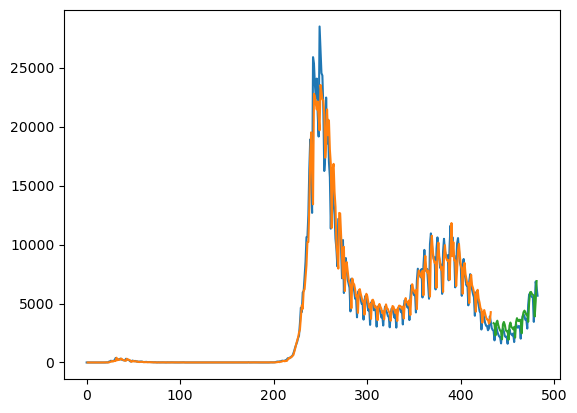

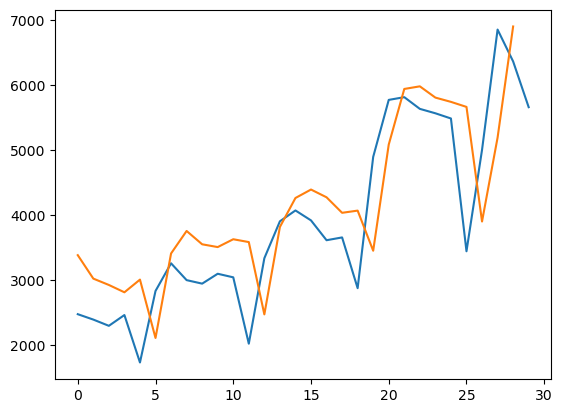

In [4]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_2 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_3 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)            

Epoch 51/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 52/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0255 - mse: 0.0255 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 53/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 54/5000
432/432 [==============================] - 3s 8ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 55/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 8.8775e-04 - val_mse: 8.8775e-04
Epoch 56/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 7.1218e-04 - val_mse: 7.1218e-04
Epoch 57/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 6.9101e-04 - val_mse: 6.9101e-04
Epoch 58/5000
432/432 [========

432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.3450e-04 - val_mse: 8.3450e-04
Epoch 109/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.0219e-04 - val_mse: 9.0219e-04
Epoch 110/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 7.2061e-04 - val_mse: 7.2061e-04
Epoch 111/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 112/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 7.8352e-04 - val_mse: 7.8352e-04
Epoch 113/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 114/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.9063e-04 - val_mse: 6.9063e-04
Epoch 115/5000
432/432 

432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6785e-04 - val_mse: 6.6785e-04
Epoch 166/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.6190e-04 - val_mse: 6.6190e-04
Epoch 167/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.0862e-04 - val_mse: 7.0862e-04
Epoch 168/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.8079e-04 - val_mse: 6.8079e-04
Epoch 169/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.1146e-04 - val_mse: 9.1146e-04
Epoch 170/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.6874e-04 - val_mse: 6.6874e-04
Epoch 171/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.4473e-04 - val_mse: 7.4473e-04
Epoch 1

432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.9978e-04 - val_mse: 6.9978e-04
Epoch 223/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.0131e-04 - val_mse: 8.0131e-04
Epoch 224/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 7.6700e-04 - val_mse: 7.6700e-04
Epoch 225/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 7.7125e-04 - val_mse: 7.7125e-04
Epoch 226/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 227/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 228/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.1801e-04 - val_mse: 8.1801e-04
Epoch 229/5000
432/432 

432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.4819e-04 - val_mse: 6.4819e-04
Epoch 280/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.4791e-04 - val_mse: 7.4791e-04
Epoch 281/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1438e-04 - val_mse: 7.1438e-04
Epoch 282/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.4578e-04 - val_mse: 6.4578e-04
Epoch 283/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.8977e-04 - val_mse: 7.8977e-04
Epoch 284/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7918e-04 - val_mse: 6.7918e-04
Epoch 285/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.9847e-04 - val_mse: 6.9847e-04
Epoch 2

432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 337/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.6079e-04 - val_mse: 8.6079e-04
Epoch 338/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.2616e-04 - val_mse: 7.2616e-04
Epoch 339/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6373e-04 - val_mse: 6.6373e-04
Epoch 340/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 341/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.6587e-04 - val_mse: 8.6587e-04
Epoch 342/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 343/5000
432/432 [=======

Epoch 394/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.6349e-04 - val_mse: 6.6349e-04
Epoch 395/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.7623e-04 - val_mse: 6.7623e-04
Epoch 396/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 9.7872e-04 - val_mse: 9.7872e-04
Epoch 397/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4582e-04 - val_mse: 6.4582e-04
Epoch 398/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8883e-04 - val_mse: 6.8883e-04
Epoch 399/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.5682e-04 - val_mse: 6.5682e-04
Epoch 400/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0014 - val_mse: 0.0014


432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.5193e-04 - val_mse: 6.5193e-04
Epoch 452/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 453/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4989e-04 - val_mse: 6.4989e-04
Epoch 454/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.1048e-04 - val_mse: 7.1048e-04
Epoch 455/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5555e-04 - val_mse: 6.5555e-04
Epoch 456/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6920e-04 - val_mse: 6.6920e-04
Epoch 457/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.9337e-04 - val_mse: 8.9337e-04
Epoch 458/5000


432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 509/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.7937e-04 - val_mse: 6.7937e-04
Epoch 510/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.4380e-04 - val_mse: 8.4380e-04
Epoch 511/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.6972e-04 - val_mse: 8.6972e-04
Epoch 512/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 9.8976e-04 - val_mse: 9.8976e-04
Epoch 513/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.2793e-04 - val_mse: 7.2793e-04
Epoch 514/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.4544e-04 - val_mse: 6.4544e-04
Epoch 515/5000


432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.6711e-04 - val_mse: 8.6711e-04
Epoch 566/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.7882e-04 - val_mse: 6.7882e-04
Epoch 567/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.5730e-04 - val_mse: 8.5730e-04
Epoch 568/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5650e-04 - val_mse: 6.5650e-04
Epoch 569/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.9871e-04 - val_mse: 8.9871e-04
Epoch 570/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.9193e-04 - val_mse: 6.9193e-04
Epoch 571/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.6214e-04 - val_mse: 6.6214e-04
Epoch 5

432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4622e-04 - val_mse: 6.4622e-04
Epoch 623/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.9318e-04 - val_mse: 6.9318e-04
Epoch 624/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.6233e-04 - val_mse: 6.6233e-04
Epoch 625/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.0856e-04 - val_mse: 7.0856e-04
Epoch 626/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 627/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4804e-04 - val_mse: 6.4804e-04
Epoch 628/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 629/5000
432/432 

Epoch 680/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.4657e-04 - val_mse: 6.4657e-04
Epoch 681/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 682/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.5394e-04 - val_mse: 7.5394e-04
Epoch 683/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.4750e-04 - val_mse: 6.4750e-04
Epoch 684/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.4939e-04 - val_mse: 6.4939e-04
Epoch 685/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 9.0105e-04 - val_mse: 9.0105e-04
Epoch 686/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.5983e-04 - val_mse: 6.5983e-04


432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.7320e-04 - val_mse: 7.7320e-04
Epoch 738/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.4842e-04 - val_mse: 7.4842e-04
Epoch 739/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.5391e-04 - val_mse: 6.5391e-04
Epoch 740/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.8118e-04 - val_mse: 7.8118e-04
Epoch 741/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.0803e-04 - val_mse: 7.0803e-04
Epoch 742/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.5411e-04 - val_mse: 6.5411e-04
Epoch 743/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.1939e-04 - val_mse: 8.1939e-04
Epoch 7

Epoch 795/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.9038e-04 - val_mse: 6.9038e-04
Epoch 796/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.8147e-04 - val_mse: 6.8147e-04
Epoch 797/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.2213e-04 - val_mse: 7.2213e-04
Epoch 798/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 799/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 9.8976e-04 - val_mse: 9.8976e-04
Epoch 800/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 801/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.7719e-04 - val_mse: 8.7719e-04
Epoch 80

432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.3851e-04 - val_mse: 8.3851e-04
Epoch 853/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 9.5892e-04 - val_mse: 9.5892e-04
Epoch 854/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.2611e-04 - val_mse: 8.2611e-04
Epoch 855/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.7071e-04 - val_mse: 7.7071e-04
Epoch 857/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 858/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 9.1920e-04 - val_mse: 9.1920e-04
Epoch 859/5000
432/432 

432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 910/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.5952e-04 - val_mse: 7.5952e-04
Epoch 911/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 912/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 9.9770e-04 - val_mse: 9.9770e-04
Epoch 913/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.9711e-04 - val_mse: 6.9711e-04
Epoch 914/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.4763e-04 - val_mse: 6.4763e-04
Epoch 915/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.5892e-04 - val_mse: 8.5892e-04
Epoch 916/5000
432/432 

432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.8809e-04 - val_mse: 6.8809e-04
Epoch 967/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.1986e-04 - val_mse: 8.1986e-04
Epoch 968/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4717e-04 - val_mse: 6.4717e-04
Epoch 969/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.0138e-04 - val_mse: 8.0138e-04
Epoch 970/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.0658e-04 - val_mse: 7.0658e-04
Epoch 971/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.8228e-04 - val_mse: 7.8228e-04
Epoch 972/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.4866e-04 - val_mse: 6.4866e-04
Epoch 9

432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.8549e-04 - val_mse: 6.8549e-04
Epoch 1024/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.9251e-04 - val_mse: 6.9251e-04
Epoch 1025/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.6015e-04 - val_mse: 6.6015e-04
Epoch 1026/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.4651e-04 - val_mse: 6.4651e-04
Epoch 1027/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.4629e-04 - val_mse: 6.4629e-04
Epoch 1028/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.9698e-04 - val_mse: 8.9698e-04
Epoch 1029/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.4605e-04 - val_mse: 7.4605e-04
E

432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.7661e-04 - val_mse: 7.7661e-04
Epoch 1081/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.5036e-04 - val_mse: 8.5036e-04
Epoch 1082/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 6.7412e-04 - val_mse: 6.7412e-04
Epoch 1083/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.9490e-04 - val_mse: 6.9490e-04
Epoch 1084/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.4776e-04 - val_mse: 6.4776e-04
Epoch 1085/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 9.1370e-04 - val_mse: 9.1370e-04
Epoch 1086/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 7.9789e-04 - val_mse: 7.9789e-04
E

Epoch 1137/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7402e-04 - val_mse: 6.7402e-04
Epoch 1138/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.5104e-04 - val_mse: 6.5104e-04
Epoch 1139/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 8.0005e-04 - val_mse: 8.0005e-04
Epoch 1140/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.4836e-04 - val_mse: 7.4836e-04
Epoch 1141/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1142/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4768e-04 - val_mse: 6.4768e-04
Epoch 1143/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.8063e-04 - val_mse: 6.80

432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 7.3250e-04 - val_mse: 7.3250e-04
Epoch 1195/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.6035e-04 - val_mse: 6.6035e-04
Epoch 1196/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.9480e-04 - val_mse: 6.9480e-04
Epoch 1197/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.7149e-04 - val_mse: 6.7149e-04
Epoch 1198/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.3287e-04 - val_mse: 7.3287e-04
Epoch 1199/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1200/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.7589e-04 - val_mse: 9.7589e-04
Epoch 120

Epoch 1251/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.7463e-04 - val_mse: 7.7463e-04
Epoch 1252/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.5643e-04 - val_mse: 6.5643e-04
Epoch 1253/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4660e-04 - val_mse: 6.4660e-04
Epoch 1254/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.7876e-04 - val_mse: 6.7876e-04
Epoch 1255/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4941e-04 - val_mse: 6.4941e-04
Epoch 1256/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.4675e-04 - val_mse: 6.4675e-04
Epoch 1257/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6435e-04 - val_m

Epoch 1308/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 6.7756e-04 - val_mse: 6.7756e-04
Epoch 1309/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4772e-04 - val_mse: 6.4772e-04
Epoch 1310/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7170e-04 - val_mse: 6.7170e-04
Epoch 1311/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1312/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.4600e-04 - val_mse: 7.4600e-04
Epoch 1313/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.8270e-04 - val_mse: 6.8270e-04
Epoch 1314/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0011 - val_mse: 0.0011
E

Epoch 1365/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.1976e-04 - val_mse: 7.1976e-04
Epoch 1366/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.4779e-04 - val_mse: 6.4779e-04
Epoch 1367/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 8.2483e-04 - val_mse: 8.2483e-04
Epoch 1368/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1369/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.5187e-04 - val_mse: 6.5187e-04
Epoch 1370/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.5233e-04 - val_mse: 8.5233e-04
Epoch 1371/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.4692e-04 - val_mse: 6.46

432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.6095e-04 - val_mse: 6.6095e-04
Epoch 1423/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.5269e-04 - val_mse: 6.5269e-04
Epoch 1424/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.6564e-04 - val_mse: 7.6564e-04
Epoch 1425/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.8308e-04 - val_mse: 8.8308e-04
Epoch 1426/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.6898e-04 - val_mse: 6.6898e-04
Epoch 1427/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.4890e-04 - val_mse: 6.4890e-04
Epoch 1428/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 8.9480e-04 - val_mse: 8.9480e-04
E

Epoch 1479/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4746e-04 - val_mse: 6.4746e-04
Epoch 1480/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.6444e-04 - val_mse: 6.6444e-04
Epoch 1481/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.2171e-04 - val_mse: 7.2171e-04
Epoch 1482/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1483/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1484/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.0956e-04 - val_mse: 7.0956e-04
Epoch 1485/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.8618e-04 - val_mse: 7.8618e-04
E

Epoch 1536/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1537/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6592e-04 - val_mse: 6.6592e-04
Epoch 1538/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.5222e-04 - val_mse: 6.5222e-04
Epoch 1539/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6467e-04 - val_mse: 6.6467e-04
Epoch 1540/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.5528e-04 - val_mse: 6.5528e-04
Epoch 1541/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5122e-04 - val_mse: 6.5122e-04
Epoch 1542/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 9.9516e-04 - val_mse: 9.95

Epoch 1593/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.8792e-04 - val_mse: 7.8792e-04
Epoch 1594/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.5705e-04 - val_mse: 6.5705e-04
Epoch 1595/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 1596/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.2946e-04 - val_mse: 9.2946e-04
Epoch 1597/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.7825e-04 - val_mse: 6.7825e-04
Epoch 1598/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 7.6042e-04 - val_mse: 7.6042e-04
Epoch 1599/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4670e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 7.6096e-04 - val_mse: 7.6096e-04
Epoch 1651/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 9.2698e-04 - val_mse: 9.2698e-04
Epoch 1652/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5200e-04 - val_mse: 6.5200e-04
Epoch 1653/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.3129e-04 - val_mse: 7.3129e-04
Epoch 1654/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.3994e-04 - val_mse: 7.3994e-04
Epoch 1655/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.1492e-04 - val_mse: 7.1492e-04
Epoch 1656/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.6905e-04 - val_mse: 7.6905e-04
E

Epoch 1707/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6077e-04 - val_mse: 6.6077e-04
Epoch 1708/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.4737e-04 - val_mse: 6.4737e-04
Epoch 1709/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4829e-04 - val_mse: 6.4829e-04
Epoch 1710/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 6.6585e-04 - val_mse: 6.6585e-04
Epoch 1711/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.7004e-04 - val_mse: 6.7004e-04
Epoch 1712/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.0297e-04 - val_mse: 7.0297e-04
Epoch 1713/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.5018e-04 - val_m

Epoch 1764/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4823e-04 - val_mse: 6.4823e-04
Epoch 1765/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 1766/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1767/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.6602e-04 - val_mse: 7.6602e-04
Epoch 1768/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1769/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.4796e-04 - val_mse: 6.4796e-04
Epoch 1770/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.8771e-04 - val_mse: 6.8771e-04
Epoch 177

432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.6450e-04 - val_mse: 6.6450e-04
Epoch 1822/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 6.4891e-04 - val_mse: 6.4891e-04
Epoch 1823/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.1363e-04 - val_mse: 8.1363e-04
Epoch 1824/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.4493e-04 - val_mse: 8.4493e-04
Epoch 1825/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.2008e-04 - val_mse: 7.2008e-04
Epoch 1826/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.3114e-04 - val_mse: 7.3114e-04
Epoch 1827/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.6582e-04 - val_mse: 7.6582e-04
E

Epoch 1878/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 6.5168e-04 - val_mse: 6.5168e-04
Epoch 1879/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.5356e-04 - val_mse: 7.5356e-04
Epoch 1880/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.6532e-04 - val_mse: 7.6532e-04
Epoch 1881/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.8771e-04 - val_mse: 6.8771e-04
Epoch 1882/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 6.7161e-04 - val_mse: 6.7161e-04
Epoch 1883/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.7342e-04 - val_mse: 6.7342e-04
Epoch 1884/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.6308e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 7.6562e-04 - val_mse: 7.6562e-04
Epoch 1935/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.1271e-04 - val_mse: 7.1271e-04
Epoch 1936/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1937/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 7.1389e-04 - val_mse: 7.1389e-04
Epoch 1938/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1939/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5246e-04 - val_mse: 6.5246e-04
Epoch 1940/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1941/5000
432/432 [

Epoch 1991/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.6750e-04 - val_mse: 6.6750e-04
Epoch 1992/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.4677e-04 - val_mse: 6.4677e-04
Epoch 1993/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.9745e-04 - val_mse: 8.9745e-04
Epoch 1994/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.6569e-04 - val_mse: 8.6569e-04
Epoch 1995/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.5920e-04 - val_mse: 7.5920e-04
Epoch 1996/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.7996e-04 - val_mse: 7.7996e-04
Epoch 1997/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.5772e-04 - val_m

Epoch 2048/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6268e-04 - val_mse: 6.6268e-04
Epoch 2049/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 7.0902e-04 - val_mse: 7.0902e-04
Epoch 2050/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.5507e-04 - val_mse: 7.5507e-04
Epoch 2051/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 8.9297e-04 - val_mse: 8.9297e-04
Epoch 2052/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.5500e-04 - val_mse: 6.5500e-04
Epoch 2053/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.7075e-04 - val_mse: 6.7075e-04
Epoch 2054/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.9751e-04 - val_m

Epoch 2105/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 8.0052e-04 - val_mse: 8.0052e-04
Epoch 2106/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.4741e-04 - val_mse: 8.4741e-04
Epoch 2107/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.4818e-04 - val_mse: 6.4818e-04
Epoch 2108/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.4595e-04 - val_mse: 6.4595e-04
Epoch 2109/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.4722e-04 - val_mse: 6.4722e-04
Epoch 2110/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.5423e-04 - val_mse: 6.5423e-04
Epoch 2111/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 8.2007e-04 - val_m

Epoch 2162/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 6.8099e-04 - val_mse: 6.8099e-04
Epoch 2163/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.6090e-04 - val_mse: 6.6090e-04
Epoch 2164/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1735e-04 - val_mse: 7.1735e-04
Epoch 2165/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.4972e-04 - val_mse: 8.4972e-04
Epoch 2166/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 2167/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2168/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 216

Epoch 2219/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 6.9377e-04 - val_mse: 6.9377e-04
Epoch 2220/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 6.9065e-04 - val_mse: 6.9065e-04
Epoch 2221/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2222/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.8024e-04 - val_mse: 6.8024e-04
Epoch 2223/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.4606e-04 - val_mse: 6.4606e-04
Epoch 2224/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2225/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.0903e-04 - val_mse: 7.0903e-04
E

Epoch 2276/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6847e-04 - val_mse: 6.6847e-04
Epoch 2277/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.7810e-04 - val_mse: 9.7810e-04
Epoch 2278/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.8450e-04 - val_mse: 6.8450e-04
Epoch 2279/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.4893e-04 - val_mse: 7.4893e-04
Epoch 2280/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 9.9548e-04 - val_mse: 9.9548e-04
Epoch 2281/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.4695e-04 - val_mse: 6.4695e-04
Epoch 2282/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 9.5033e-04 - val_m

Epoch 2333/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.8229e-04 - val_mse: 6.8229e-04
Epoch 2334/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6310e-04 - val_mse: 6.6310e-04
Epoch 2335/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 8.8939e-04 - val_mse: 8.8939e-04
Epoch 2336/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.1145e-04 - val_mse: 8.1145e-04
Epoch 2337/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.4061e-04 - val_mse: 8.4061e-04
Epoch 2338/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.5781e-04 - val_mse: 7.5781e-04
Epoch 2339/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.5280e-04 - val_m

Epoch 2390/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4659e-04 - val_mse: 6.4659e-04
Epoch 2391/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2392/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.0305e-04 - val_mse: 8.0305e-04
Epoch 2393/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.3428e-04 - val_mse: 8.3428e-04
Epoch 2394/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.4952e-04 - val_mse: 6.4952e-04
Epoch 2395/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.5397e-04 - val_mse: 6.5397e-04
Epoch 2396/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.9994e-04 - val_mse: 9.99

Epoch 2447/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.4598e-04 - val_mse: 6.4598e-04
Epoch 2448/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.0595e-04 - val_mse: 7.0595e-04
Epoch 2449/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2450/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.5605e-04 - val_mse: 6.5605e-04
Epoch 2451/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.4618e-04 - val_mse: 6.4618e-04
Epoch 2452/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.4600e-04 - val_mse: 6.4600e-04
Epoch 2453/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.5261e-04 - val_mse: 6.52

432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2504/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1575e-04 - val_mse: 7.1575e-04
Epoch 2505/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7862e-04 - val_mse: 6.7862e-04
Epoch 2506/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.4036e-04 - val_mse: 7.4036e-04
Epoch 2507/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.8084e-04 - val_mse: 7.8084e-04
Epoch 2508/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4598e-04 - val_mse: 6.4598e-04
Epoch 2509/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.4691e-04 - val_mse: 6.4691e-04
Epoch 251

Epoch 2560/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.4930e-04 - val_mse: 6.4930e-04
Epoch 2561/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.6155e-04 - val_mse: 6.6155e-04
Epoch 2562/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.4765e-04 - val_mse: 6.4765e-04
Epoch 2563/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5755e-04 - val_mse: 6.5755e-04
Epoch 2564/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.4902e-04 - val_mse: 6.4902e-04
Epoch 2565/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 7.4965e-04 - val_mse: 7.4965e-04
Epoch 2566/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4853e-04 - val_m

Epoch 2617/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.8734e-04 - val_mse: 7.8734e-04
Epoch 2618/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.8901e-04 - val_mse: 6.8901e-04
Epoch 2619/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 8.2014e-04 - val_mse: 8.2014e-04
Epoch 2620/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.4751e-04 - val_mse: 6.4751e-04
Epoch 2621/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.4691e-04 - val_mse: 6.4691e-04
Epoch 2622/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.9146e-04 - val_mse: 6.9146e-04
Epoch 2623/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.2881e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.1481e-04 - val_mse: 7.1481e-04
Epoch 2674/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.7010e-04 - val_mse: 7.7010e-04
Epoch 2675/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2676/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.9750e-04 - val_mse: 6.9750e-04
Epoch 2677/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.4170e-04 - val_mse: 7.4170e-04
Epoch 2678/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 7.1287e-04 - val_mse: 7.1287e-04
Epoch 2679/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.4885e-04 - val_mse: 6.4885e-04
Epoch 268

Epoch 2730/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.4654e-04 - val_mse: 6.4654e-04
Epoch 2731/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.4940e-04 - val_mse: 8.4940e-04
Epoch 2732/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 8.4953e-04 - val_mse: 8.4953e-04
Epoch 2733/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.5281e-04 - val_mse: 9.5281e-04
Epoch 2734/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.4648e-04 - val_mse: 6.4648e-04
Epoch 2735/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.4718e-04 - val_mse: 6.4718e-04
Epoch 2736/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.2910e-04 - val_m

Epoch 2787/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.4151e-04 - val_mse: 7.4151e-04
Epoch 2788/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.7670e-04 - val_mse: 6.7670e-04
Epoch 2789/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2790/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.6831e-04 - val_mse: 6.6831e-04
Epoch 2791/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.3126e-04 - val_mse: 8.3126e-04
Epoch 2792/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.2506e-04 - val_mse: 9.2506e-04
Epoch 2793/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0012 - val_mse: 0.0012
E

Epoch 2844/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.3280e-04 - val_mse: 7.3280e-04
Epoch 2845/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.4777e-04 - val_mse: 6.4777e-04
Epoch 2846/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.4800e-04 - val_mse: 6.4800e-04
Epoch 2847/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.4672e-04 - val_mse: 6.4672e-04
Epoch 2848/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.7225e-04 - val_mse: 6.7225e-04
Epoch 2849/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.3063e-04 - val_mse: 7.3063e-04
Epoch 2850/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.5419e-04 - val_m

Epoch 2901/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 8.2011e-04 - val_mse: 8.2011e-04
Epoch 2902/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.3242e-04 - val_mse: 8.3242e-04
Epoch 2903/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.6729e-04 - val_mse: 6.6729e-04
Epoch 2904/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.9342e-04 - val_mse: 7.9342e-04
Epoch 2905/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 9.3677e-04 - val_mse: 9.3677e-04
Epoch 2906/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.6239e-04 - val_mse: 6.6239e-04
Epoch 2907/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.2589e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.1135e-04 - val_mse: 7.1135e-04
Epoch 2958/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 6.8407e-04 - val_mse: 6.8407e-04
Epoch 2959/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.0313e-04 - val_mse: 7.0313e-04
Epoch 2960/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.3299e-04 - val_mse: 7.3299e-04
Epoch 2961/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.0617e-04 - val_mse: 9.0617e-04
Epoch 2962/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 7.0390e-04 - val_mse: 7.0390e-04
Epoch 2963/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 9.2165e-04 - val_mse: 9.2165e-04
E

Epoch 3014/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3015/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.6411e-04 - val_mse: 6.6411e-04
Epoch 3016/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 6.5692e-04 - val_mse: 6.5692e-04
Epoch 3017/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.8756e-04 - val_mse: 6.8756e-04
Epoch 3018/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 8.9131e-04 - val_mse: 8.9131e-04
Epoch 3019/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.2639e-04 - val_mse: 7.2639e-04
Epoch 3020/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.4639e-04 - val_mse: 6.46

Epoch 3071/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.4831e-04 - val_mse: 6.4831e-04
Epoch 3072/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.4780e-04 - val_mse: 6.4780e-04
Epoch 3073/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.4987e-04 - val_mse: 6.4987e-04
Epoch 3074/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.9856e-04 - val_mse: 7.9856e-04
Epoch 3075/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.8002e-04 - val_mse: 6.8002e-04
Epoch 3076/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 8.6165e-04 - val_mse: 8.6165e-04
Epoch 3077/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.0731e-04 - val_m

Epoch 3128/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 8.1668e-04 - val_mse: 8.1668e-04
Epoch 3129/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 6.5808e-04 - val_mse: 6.5808e-04
Epoch 3130/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 9.1255e-04 - val_mse: 9.1255e-04
Epoch 3131/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.6900e-04 - val_mse: 6.6900e-04
Epoch 3132/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 7.6515e-04 - val_mse: 7.6515e-04
Epoch 3133/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.5843e-04 - val_mse: 6.5843e-04
Epoch 3134/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.4630e-04 - val_m

Epoch 3185/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.7256e-04 - val_mse: 6.7256e-04
Epoch 3186/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 7.5714e-04 - val_mse: 7.5714e-04
Epoch 3187/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.7295e-04 - val_mse: 8.7295e-04
Epoch 3188/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.8839e-04 - val_mse: 8.8839e-04
Epoch 3189/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.5360e-04 - val_mse: 6.5360e-04
Epoch 3190/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.4847e-04 - val_mse: 6.4847e-04
Epoch 3191/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.5066e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 7.7001e-04 - val_mse: 7.7001e-04
Epoch 3242/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.5750e-04 - val_mse: 6.5750e-04
Epoch 3243/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.0759e-04 - val_mse: 7.0759e-04
Epoch 3244/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.8921e-04 - val_mse: 8.8921e-04
Epoch 3245/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3246/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.0718e-04 - val_mse: 7.0718e-04
Epoch 3247/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 6.6505e-04 - val_mse: 6.6505e-04
Epoch 324

Epoch 3298/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5576e-04 - val_mse: 6.5576e-04
Epoch 3299/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5323e-04 - val_mse: 6.5323e-04
Epoch 3300/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.7942e-04 - val_mse: 6.7942e-04
Epoch 3301/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.9047e-04 - val_mse: 6.9047e-04
Epoch 3302/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.6483e-04 - val_mse: 8.6483e-04
Epoch 3303/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 6.4654e-04 - val_mse: 6.4654e-04
Epoch 3304/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7119e-04 - val_m

Epoch 3355/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.9415e-04 - val_mse: 7.9415e-04
Epoch 3356/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 7.4892e-04 - val_mse: 7.4892e-04
Epoch 3357/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7968e-04 - val_mse: 6.7968e-04
Epoch 3358/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.3323e-04 - val_mse: 7.3323e-04
Epoch 3359/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.1359e-04 - val_mse: 7.1359e-04
Epoch 3360/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.0853e-04 - val_mse: 8.0853e-04
Epoch 3361/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.1971e-04 - val_m

Epoch 3412/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.9305e-04 - val_mse: 6.9305e-04
Epoch 3413/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 9.4632e-04 - val_mse: 9.4632e-04
Epoch 3414/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.2534e-04 - val_mse: 8.2534e-04
Epoch 3415/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.1423e-04 - val_mse: 8.1423e-04
Epoch 3416/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5820e-04 - val_mse: 6.5820e-04
Epoch 3417/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.1604e-04 - val_mse: 7.1604e-04
Epoch 3418/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.6272e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.6098e-04 - val_mse: 6.6098e-04
Epoch 3469/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.3817e-04 - val_mse: 8.3817e-04
Epoch 3470/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 9.2226e-04 - val_mse: 9.2226e-04
Epoch 3471/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.4916e-04 - val_mse: 6.4916e-04
Epoch 3472/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 7.6678e-04 - val_mse: 7.6678e-04
Epoch 3473/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.4683e-04 - val_mse: 6.4683e-04
Epoch 3474/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4840e-04 - val_mse: 6.4840e-04
E

Epoch 3525/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.1149e-04 - val_mse: 9.1149e-04
Epoch 3526/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.3569e-04 - val_mse: 7.3569e-04
Epoch 3527/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.4606e-04 - val_mse: 6.4606e-04
Epoch 3528/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.4683e-04 - val_mse: 6.4683e-04
Epoch 3529/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.6318e-04 - val_mse: 6.6318e-04
Epoch 3530/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 9.0983e-04 - val_mse: 9.0983e-04
Epoch 3531/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 7.6797e-04 - val_m

Epoch 3582/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.4639e-04 - val_mse: 6.4639e-04
Epoch 3583/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.6624e-04 - val_mse: 7.6624e-04
Epoch 3584/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.6427e-04 - val_mse: 6.6427e-04
Epoch 3585/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6404e-04 - val_mse: 6.6404e-04
Epoch 3586/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.2205e-04 - val_mse: 7.2205e-04
Epoch 3587/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.4320e-04 - val_mse: 7.4320e-04
Epoch 3588/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.5853e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.7423e-04 - val_mse: 7.7423e-04
Epoch 3639/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4739e-04 - val_mse: 6.4739e-04
Epoch 3640/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.9148e-04 - val_mse: 6.9148e-04
Epoch 3641/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.8975e-04 - val_mse: 6.8975e-04
Epoch 3642/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5302e-04 - val_mse: 6.5302e-04
Epoch 3643/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.5877e-04 - val_mse: 6.5877e-04
Epoch 3644/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.7834e-04 - val_mse: 6.7834e-04
E

Epoch 3695/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.4591e-04 - val_mse: 6.4591e-04
Epoch 3696/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.5771e-04 - val_mse: 6.5771e-04
Epoch 3697/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 7.3896e-04 - val_mse: 7.3896e-04
Epoch 3698/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.4743e-04 - val_mse: 6.4743e-04
Epoch 3699/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.7932e-04 - val_mse: 7.7932e-04
Epoch 3700/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.9959e-04 - val_mse: 8.9959e-04
Epoch 3701/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.6422e-04 - val_m

Epoch 3752/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.2011e-04 - val_mse: 7.2011e-04
Epoch 3753/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.1518e-04 - val_mse: 7.1518e-04
Epoch 3754/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4769e-04 - val_mse: 6.4769e-04
Epoch 3755/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.4663e-04 - val_mse: 6.4663e-04
Epoch 3756/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.3075e-04 - val_mse: 7.3075e-04
Epoch 3757/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.6224e-04 - val_mse: 6.6224e-04
Epoch 3758/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0015 - val_mse: 

Epoch 3809/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 6.4659e-04 - val_mse: 6.4659e-04
Epoch 3810/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 8.5764e-04 - val_mse: 8.5764e-04
Epoch 3811/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.1074e-04 - val_mse: 8.1074e-04
Epoch 3812/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 6.5639e-04 - val_mse: 6.5639e-04
Epoch 3813/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.9326e-04 - val_mse: 6.9326e-04
Epoch 3814/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5991e-04 - val_mse: 6.5991e-04
Epoch 3815/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7097e-04 - val_m

Epoch 3866/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 7.1854e-04 - val_mse: 7.1854e-04
Epoch 3867/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.7205e-04 - val_mse: 6.7205e-04
Epoch 3868/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.5253e-04 - val_mse: 6.5253e-04
Epoch 3869/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.8956e-04 - val_mse: 6.8956e-04
Epoch 3870/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.8093e-04 - val_mse: 6.8093e-04
Epoch 3871/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.5785e-04 - val_mse: 6.5785e-04
Epoch 3872/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 6.7981e-04 - val_m

432/432 [==============================] - 3s 7ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4948e-04 - val_mse: 6.4948e-04
Epoch 3923/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 7.5568e-04 - val_mse: 7.5568e-04
Epoch 3924/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.2226e-04 - val_mse: 7.2226e-04
Epoch 3925/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.7141e-04 - val_mse: 8.7141e-04
Epoch 3926/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.4735e-04 - val_mse: 6.4735e-04
Epoch 3927/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.9123e-04 - val_mse: 7.9123e-04
Epoch 3928/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 7.3552e-04 - val_mse: 7.3552e-04
E

Epoch 3979/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.6667e-04 - val_mse: 6.6667e-04
Epoch 3980/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.5025e-04 - val_mse: 6.5025e-04
Epoch 3981/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.9012e-04 - val_mse: 6.9012e-04
Epoch 3982/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.5189e-04 - val_mse: 6.5189e-04
Epoch 3983/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.6992e-04 - val_mse: 6.6992e-04
Epoch 3984/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.4932e-04 - val_mse: 6.4932e-04
Epoch 3985/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.7110e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.6217e-04 - val_mse: 7.6217e-04
Epoch 4036/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.0286e-04 - val_mse: 7.0286e-04
Epoch 4037/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.4611e-04 - val_mse: 6.4611e-04
Epoch 4038/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4039/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 6.4886e-04 - val_mse: 6.4886e-04
Epoch 4040/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7194e-04 - val_mse: 6.7194e-04
Epoch 4041/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.6084e-04 - val_mse: 7.6084e-04
Epoch 404

Epoch 4092/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 7.1561e-04 - val_mse: 7.1561e-04
Epoch 4093/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.6727e-04 - val_mse: 6.6727e-04
Epoch 4094/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.5792e-04 - val_mse: 6.5792e-04
Epoch 4095/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 7.3293e-04 - val_mse: 7.3293e-04
Epoch 4096/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.3346e-04 - val_mse: 7.3346e-04
Epoch 4097/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 9.4271e-04 - val_mse: 9.4271e-04
Epoch 4098/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.4436e-04 - val_m

432/432 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6498e-04 - val_mse: 6.6498e-04
Epoch 4149/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.3783e-04 - val_mse: 7.3783e-04
Epoch 4150/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4151/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 7.8151e-04 - val_mse: 7.8151e-04
Epoch 4152/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 8.8722e-04 - val_mse: 8.8722e-04
Epoch 4153/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.7298e-04 - val_mse: 6.7298e-04
Epoch 4154/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.8088e-04 - val_mse: 6.8088e-04
Epoch 415

Epoch 4205/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.0755e-04 - val_mse: 8.0755e-04
Epoch 4206/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.5696e-04 - val_mse: 6.5696e-04
Epoch 4207/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 6.9398e-04 - val_mse: 6.9398e-04
Epoch 4208/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.9916e-04 - val_mse: 6.9916e-04
Epoch 4209/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.8784e-04 - val_mse: 7.8784e-04
Epoch 4210/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 7.9734e-04 - val_mse: 7.9734e-04
Epoch 4211/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.6413e-04 - val_m

432/432 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4262/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4749e-04 - val_mse: 6.4749e-04
Epoch 4263/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.6640e-04 - val_mse: 6.6640e-04
Epoch 4264/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.3236e-04 - val_mse: 7.3236e-04
Epoch 4265/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.8085e-04 - val_mse: 7.8085e-04
Epoch 4266/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.4768e-04 - val_mse: 6.4768e-04
Epoch 4267/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.6535e-04 - val_mse: 6.6535e-04
Epoch 426

Epoch 4318/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.1491e-04 - val_mse: 8.1491e-04
Epoch 4319/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.5308e-04 - val_mse: 6.5308e-04
Epoch 4320/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.5766e-04 - val_mse: 6.5766e-04
Epoch 4321/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.4039e-04 - val_mse: 7.4039e-04
Epoch 4322/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.4795e-04 - val_mse: 6.4795e-04
Epoch 4323/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 8.6971e-04 - val_mse: 8.6971e-04
Epoch 4324/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.4659e-04 - val_m

432/432 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.4535e-04 - val_mse: 7.4535e-04
Epoch 4375/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4696e-04 - val_mse: 6.4696e-04
Epoch 4376/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 6.6044e-04 - val_mse: 6.6044e-04
Epoch 4377/5000
432/432 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6499e-04 - val_mse: 6.6499e-04
Epoch 4378/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.7266e-04 - val_mse: 7.7266e-04
Epoch 4379/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.7050e-04 - val_mse: 6.7050e-04
Epoch 4380/5000
432/432 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.2335e-04 - val_mse: 7.2335e-04
E

432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.7247e-04 - val_mse: 8.7247e-04
Epoch 4431/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.5616e-04 - val_mse: 6.5616e-04
Epoch 4432/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.9438e-04 - val_mse: 6.9438e-04
Epoch 4433/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.9081e-04 - val_mse: 6.9081e-04
Epoch 4434/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 6.4654e-04 - val_mse: 6.4654e-04
Epoch 4435/5000
432/432 [==============================] - 3s 7ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4671e-04 - val_mse: 6.4671e-04
Epoch 4436/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.2538e-04 - val_mse: 7.2538e-04
E

Epoch 4487/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.4794e-04 - val_mse: 6.4794e-04
Epoch 4488/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.4692e-04 - val_mse: 6.4692e-04
Epoch 4489/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.1671e-04 - val_mse: 7.1671e-04
Epoch 4490/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.9435e-04 - val_mse: 6.9435e-04
Epoch 4491/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4492/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 6.6591e-04 - val_mse: 6.6591e-04
Epoch 4493/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 7.9770e-04 - val_mse: 7.97

Epoch 4544/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 9.6353e-04 - val_mse: 9.6353e-04
Epoch 4545/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.9869e-04 - val_mse: 6.9869e-04
Epoch 4546/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.4778e-04 - val_mse: 6.4778e-04
Epoch 4547/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.4661e-04 - val_mse: 6.4661e-04
Epoch 4548/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 6.4963e-04 - val_mse: 6.4963e-04
Epoch 4549/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.4353e-04 - val_mse: 7.4353e-04
Epoch 4550/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.4634e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.9107e-04 - val_mse: 6.9107e-04
Epoch 4601/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.5365e-04 - val_mse: 6.5365e-04
Epoch 4602/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 6.4904e-04 - val_mse: 6.4904e-04
Epoch 4603/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.8568e-04 - val_mse: 7.8568e-04
Epoch 4604/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.5024e-04 - val_mse: 6.5024e-04
Epoch 4605/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4606/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.8355e-04 - val_mse: 6.8355e-04
Epoch 460

Epoch 4657/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 7.9685e-04 - val_mse: 7.9685e-04
Epoch 4658/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.5809e-04 - val_mse: 6.5809e-04
Epoch 4659/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.6643e-04 - val_mse: 6.6643e-04
Epoch 4660/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 6.5683e-04 - val_mse: 6.5683e-04
Epoch 4661/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.4741e-04 - val_mse: 6.4741e-04
Epoch 4662/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.9086e-04 - val_mse: 6.9086e-04
Epoch 4663/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.4647e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.8099e-04 - val_mse: 6.8099e-04
Epoch 4714/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.7124e-04 - val_mse: 6.7124e-04
Epoch 4715/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 6.8132e-04 - val_mse: 6.8132e-04
Epoch 4716/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.7468e-04 - val_mse: 7.7468e-04
Epoch 4717/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.9439e-04 - val_mse: 6.9439e-04
Epoch 4718/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.5600e-04 - val_mse: 7.5600e-04
Epoch 4719/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.6292e-04 - val_mse: 9.6292e-04
E

Epoch 4770/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.7453e-04 - val_mse: 7.7453e-04
Epoch 4771/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.4992e-04 - val_mse: 6.4992e-04
Epoch 4772/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.0145e-04 - val_mse: 7.0145e-04
Epoch 4773/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.8678e-04 - val_mse: 7.8678e-04
Epoch 4774/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7397e-04 - val_mse: 6.7397e-04
Epoch 4775/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.4764e-04 - val_mse: 6.4764e-04
Epoch 4776/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.5825e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.4753e-04 - val_mse: 6.4753e-04
Epoch 4827/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.7710e-04 - val_mse: 6.7710e-04
Epoch 4828/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.4669e-04 - val_mse: 6.4669e-04
Epoch 4829/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.6824e-04 - val_mse: 6.6824e-04
Epoch 4830/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.3150e-04 - val_mse: 8.3150e-04
Epoch 4831/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.5109e-04 - val_mse: 6.5109e-04
Epoch 4832/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.4681e-04 - val_mse: 7.4681e-04
E

Epoch 4883/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.2061e-04 - val_mse: 9.2061e-04
Epoch 4884/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.7382e-04 - val_mse: 7.7382e-04
Epoch 4885/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 6.4855e-04 - val_mse: 6.4855e-04
Epoch 4886/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.5277e-04 - val_mse: 6.5277e-04
Epoch 4887/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.5814e-04 - val_mse: 6.5814e-04
Epoch 4888/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.5562e-04 - val_mse: 6.5562e-04
Epoch 4889/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.5798e-04 - val_m

432/432 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.7867e-04 - val_mse: 6.7867e-04
Epoch 4940/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5117e-04 - val_mse: 6.5117e-04
Epoch 4941/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4942/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.5209e-04 - val_mse: 7.5209e-04
Epoch 4943/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.7768e-04 - val_mse: 6.7768e-04
Epoch 4944/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.4729e-04 - val_mse: 6.4729e-04
Epoch 4945/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.4796e-04 - val_mse: 6.4796e-04
Epoch 494

Epoch 4996/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.6659e-04 - val_mse: 6.6659e-04
Epoch 4997/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.5966e-04 - val_mse: 6.5966e-04
Epoch 4998/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.4684e-04 - val_mse: 6.4684e-04
Epoch 4999/5000
432/432 [==============================] - 3s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.4829e-04 - val_mse: 6.4829e-04
Epoch 5000/5000
2/2 [==============================] - 0s 6ms/step
Train Score: 1424.59 RMSE
Test Score: 751.83 RMSE


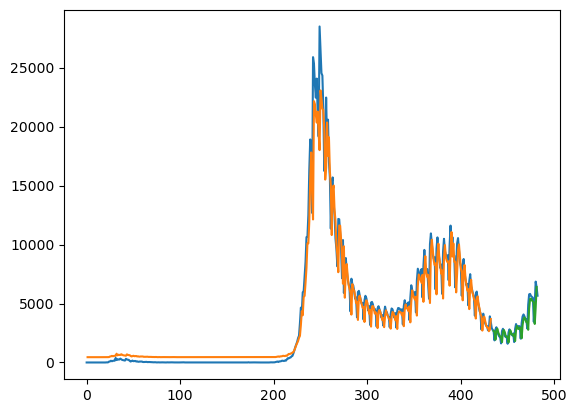

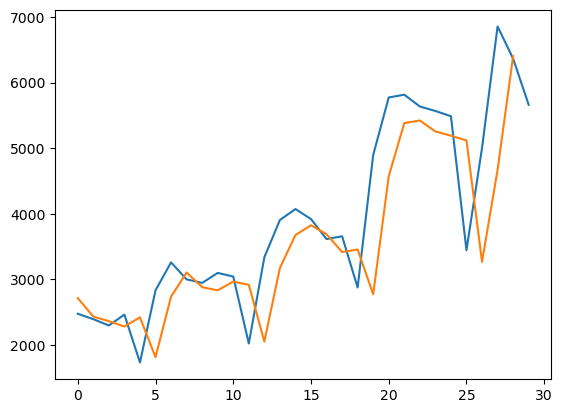

In [5]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="newTaipei_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('newTaipei_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('newTaipei_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("newTaipei_rnn+lstm_5000_predict&real_4.png")
plt.show()